<p style="align: center;"><img src="https://static.tildacdn.com/tild6636-3531-4239-b465-376364646465/Deep_Learning_School.png", width=550, height=300></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Transfer Learning</b></h3>

Как Вы уже знаете в современных задачах обработки изображений, будь то задача обнаружения объектов, задача распознавания образов, задача (семантической) сегментации, задача классификации изображений и другие, всё чаще используют **свёрточные нейросети** (*Convolutional Neural Networks*, *CNN*).

Они показывают очень хорошие результаты, за ними стоит как [математический аппарат](https://stats.stackexchange.com/questions/269854/are-there-mathematical-reasons-for-convolution-in-neural-networks-beyond-expedie), так и эвристики, полученные опытным путём.

В данном задании Вам предстоит познакомиться с архитектурами *AlexNet*, *VGG* и *Inception* и для каждой из этих моделей использовать технику **Transfer Learning**.  

* **Transfer Learning** - это процесс дообучения на **новых данных** какой-либо нейросети, уже обученной до этого на других данных, обычно на каком-нибудь хорошем, большом (миллионы картинок) датасете (например, [ImageNet](http://www.image-net.org/) ~ 14 млн картинок).

<h2 style="text-align: center;"><b>AlexNet</b></h2>

**AlexNet** - нейронная сеть, которая победила в ILSVRC (соревнование по классификации картинок из ImageNet) в 2012 году и стала основой для многих других архитектур. Впервые она была представлена в статье  “ImageNet Classification with Deep Convolutional Neural Networks”, над которой работал Джоффри Хинтон - человек, которого многие называют отцом современного computer vision.

Архитектура описана на картинке ниже

<img src="https://www.learnopencv.com/wp-content/uploads/2018/05/AlexNet-1.png">

**AlexNet** состоит из 5 **сверточных** слоев, 3 **MaxPool** слоев и 2 **FullyConnected** слоев в конце. Обратите внимание, что в последнем пулинг слое окна, из которых берется максимум, пересекаются за счет того, что *stride*=2. Это изменение по сравнению с традиционным пулингом помогло снизить ошибку на 0.4%.

По сути **AlexNet** это самая базовая архитектура для сверточной сети после LeNet, которую мы уже писали на предыдущем занятии.

<h2 style="text-align: center;"><b>VGG</b></h3>

Один **сверточный** слой с фильтром 5$\times$5 можно заменить двумя подряд идущими слоями с фильтрами размером 3$\times$3, так как **воспринимаемая область** картинки у них будет одинаковой. При этом уменьшиться количество параметров, поэтому такую сеть будет легче обучать.

На момент создания VGG люди уже заметили, что чем больше слоев в нейросети, тем выше ее точность. Заменяя большие фильтры на несколько фильтров 3$\times$3 исследователи получили глубокую нейросеть с меньшим количеством параметров. Архитектура VGG-16 (версии VGG с 16 слоями) представлена на картинке ниже:


<img src="https://cdn-images-1.medium.com/max/1040/1*0Tk4JclhGOCR_uLe6RKvUQ.png">

Когда говорят **VGG**, то чаще всего имеют ввиду **VGG-16** или **VGG-19**. Более глубоких версий **VGG** нет, так как после 19 слоев точность начинает падать.

Чтобы добиться высоких результатов в соревновании при обучении и валидации нейросети использовались дополнительные премы, подробнее о которых можно прочитать в [статье на Medium](https://medium.com/coinmonks/paper-review-of-vggnet-1st-runner-up-of-ilsvlc-2014-image-classification-d02355543a11).


<h2 style="text-align: center;"><b>Inception v1</b></h3>

### Рассмотрим идею, которая подтолкнула исследователей к созданию этой архитектуры.

Площадь, которую занимает классифицируемый объект, может очень сильно отличаться. Пример на картинке ниже:

<img src="https://cdn-images-1.medium.com/max/1040/1*aBdPBGAeta-_AM4aEyqeTQ.jpeg">

* Для извлечения информации с большой площади лучше всего подходят **большие** фильтры, и наоборот для маленьких объектов лучше **маленькие** фильтры.
* Глубокие нейронные сети намного сложнее обучать: в них появляется проблема **затухания градиента** и они **переобучаются**.
Чтобы решить первую проблему исследователи придумали **Incepton** модуль, который применяет фильтры разного размера и затем склеивает полученные каналы. При этом извлекается как информация из больших объектов, так и из маленьких. Простейшая реализация модуля выглядит так:
<img src="https://cdn-images-1.medium.com/max/1040/1*DKjGRDd_lJeUfVlY50ojOA.png">

Реализацию можно сделать более эффективной, если сначала уменьшить количество каналов с помощью **сверточного слоя** 1$\times$1 и лишь затем применить **слой** с фильтрами 5$\times$5. Сокращение вычислений происходит за счет того, что мы сначала **уменьшаем размерность** данных и лишь затем преобразовываем их. Продвинутая реализация:



<img src="https://cdn-images-1.medium.com/max/1040/1*U_McJnp7Fnif-lw9iIC5Bw.png">

Сеть состоит из **корня** (нескольких сверточных слоев) и **Inception** модулей идущих за ним. Оранжевым прямоугольников выделен корень, а фиолетовыми - **вспомогательные классификаторы**. Именно они помогают бороться со второй проблемой, которую мы упомянули ранее. Наша функция потерь - взвешенная сумма **LogLoss** на двух **вспомогательных классификаторах** и **основном** в конце нейронной сети.
<img src="https://cdn-images-1.medium.com/max/1040/1*uW81y16b-ptBDV8SIT1beQ.png">

После Inception v1 были представлены 2, 3 и 4 версии, пррочитать о которых вы можете  в [статье на Medium](https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202).

Однако сейчас научились иначе бороться с затуханием градиентов с помощью **residual conncection**. Это позволило увеличить число слоев в нейронной сети.

![](https://i.imgur.com/XwcnU5x.png)

<h2 style="text-align: center;"><b>Transfer Learning</b></h3>

Теперь мы перейдем к тому, как можно использовать уже обученные нейросети, чтобы ускорить свою работу.

Давайте вспомним общую архитектуру CNN:

<img src="https://drive.google.com/uc?id=14pApKqQjnmWMXazY0HHjREn9rI9uwCQg">

С помощью операций *свёртки (convolution)* и *пулинга (pooling)* всё, что расположено до этапа *classification*, по сути **извлекает признаки из объектов, подающихся на вход** (картинок, в данном случае). То есть вместо того, чтобы самим пытаться как-то описать картинки для хорошей работы классификатора, мы предоставляем заняться этим нейросети (обучая её методом обратного распространения ошибки ([лекция 4](https://www.youtube.com/watch?v=HZDOhHAg5_g))).

**Вопрос (творческий):**  А какие признаки для картинок приходят Вам в голову? (считать, что картинки цветные (3 канала), все одинакового размера)

**Ответ:** <Ваши мысли>

Представим теперь, что eсть свой набор данных, и Вы хотите научить сеть классифицировать объекты из Вашей выборки.  


Надеемся, что теперь Вам стало понятнее, как обучать крутые сети на новых данных.

<h2 style="text-align: center;"><b>Переходим к практике</b></h3>

<p style="text-align: center;"><i>(основано на http://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)</i></p>

Мы будем пользоваться библиотекой PyTorch. Если Вы её ещё не установили, то вот [инструкция на Wiki по установке PyTorch](https://github.com/deepmipt/dlschl/wiki/%D0%98%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%BA%D1%86%D0%B8%D1%8F-%D0%BF%D0%BE-%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5-PyTorch).

In [2]:
!pip install -q torchvision catalyst

^C
Note: you may need to restart the kernel to use updated packages.


Requested catalyst from https://files.pythonhosted.org/packages/05/09/36a4acd1c3112f2e2da74f4340778100a205ecb59166be00dc6287f3364f/catalyst-22.4-py2.py3-none-any.whl has invalid metadata: Expected matching RIGHT_PARENTHESIS for LEFT_PARENTHESIS, after version specifier
    scikit-image (<0.19.0>=0.16.1) ; extra == 'all'
                 ~~~~~~~~^
Please use pip<24.1 if you need to use this version.
Requested catalyst from https://files.pythonhosted.org/packages/28/4f/380899b95b45f02182e7163b4e9be4749724c898886d70009168bfd07409/catalyst-22.2.1-py2.py3-none-any.whl has invalid metadata: Expected matching RIGHT_PARENTHESIS for LEFT_PARENTHESIS, after version specifier
    scikit-image (<0.19.0>=0.16.1) ; extra == 'all'
                 ~~~~~~~~^
Please use pip<24.1 if you need to use this version.
Requested catalyst from https://files.pythonhosted.org/packages/77/83/da7d57924cb93e5c2453f685f5c4800365844df75b853559ccf024992cbc/catalyst-22.2-py2.py3-none-any.whl has invalid metadata: Expect

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import time
import os

### В чём состоит задание

Вам предстоит попробовать использовать  типа архитектур свёрточных нейросетей - **AlexNet (сделано за Вас в примере), VGG16, Inception_v3** - как *Feature Extractor*, с помощью *Fine Tuning* и *"из коробки"*.

**Для каждого пункта нужно:**
- вывести график loss'а на обучающей и на валидационной выборке
- вывести качество модели (accuracy)

### Данные  

В данном задании используются сети (из библиотеки **torchvision**), предобученные на датасете ImageNet.  
В качестве новых данных будет датасет Меравьи vs Пчёлы, Вам нужно скачать его отсюда: **[Муравьи vs Пчёлы](https://download.pytorch.org/tutorial/hymenoptera_data.zip)**, *являющийся частью датасета ImageNet*. В нём 400 картинок, ~250 обучение и ~150 валидация (тест).

### Функции для отрисовки и обучения модели:

* Загрузим данные:

In [4]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
!unzip hymenoptera_data.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# Преобразование обучающих данных для расширения обучающей выборки и её нормализация
# Для валидационной (тестовой) выборки только нормализация
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(244),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(244),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
# папка с данными. Если запускаете в колабе, нужно скопировать данные к себе в директорию и примонтировать диск. Если запускаете локально -- просто скачайте данные
data_dir = './hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
# специальный класс для загрузки данных в виде батчей

train_dataloader = torch.utils.data.DataLoader(
    image_datasets["train"], batch_size=32,
    shuffle=True
)
val_dataloader = torch.utils.data.DataLoader(
    image_datasets["val"], batch_size=128
)

loaders = {
    "train": train_dataloader,
    "valid": val_dataloader
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

use_gpu = torch.cuda.is_available()


Размеры обучающей и валидационной выборок:

In [6]:
print(dataset_sizes)

{'train': 244, 'val': 153}


**Вопрос (на понимание кода выше):**  
1. В DataLoader() выше стоит "shuffle=True". Для чего это нужно?
2. Сколько картинок будет в каждом батче?

**Ответ:** <Ваш ответ>

* Посмотрим на картинки из датасета:

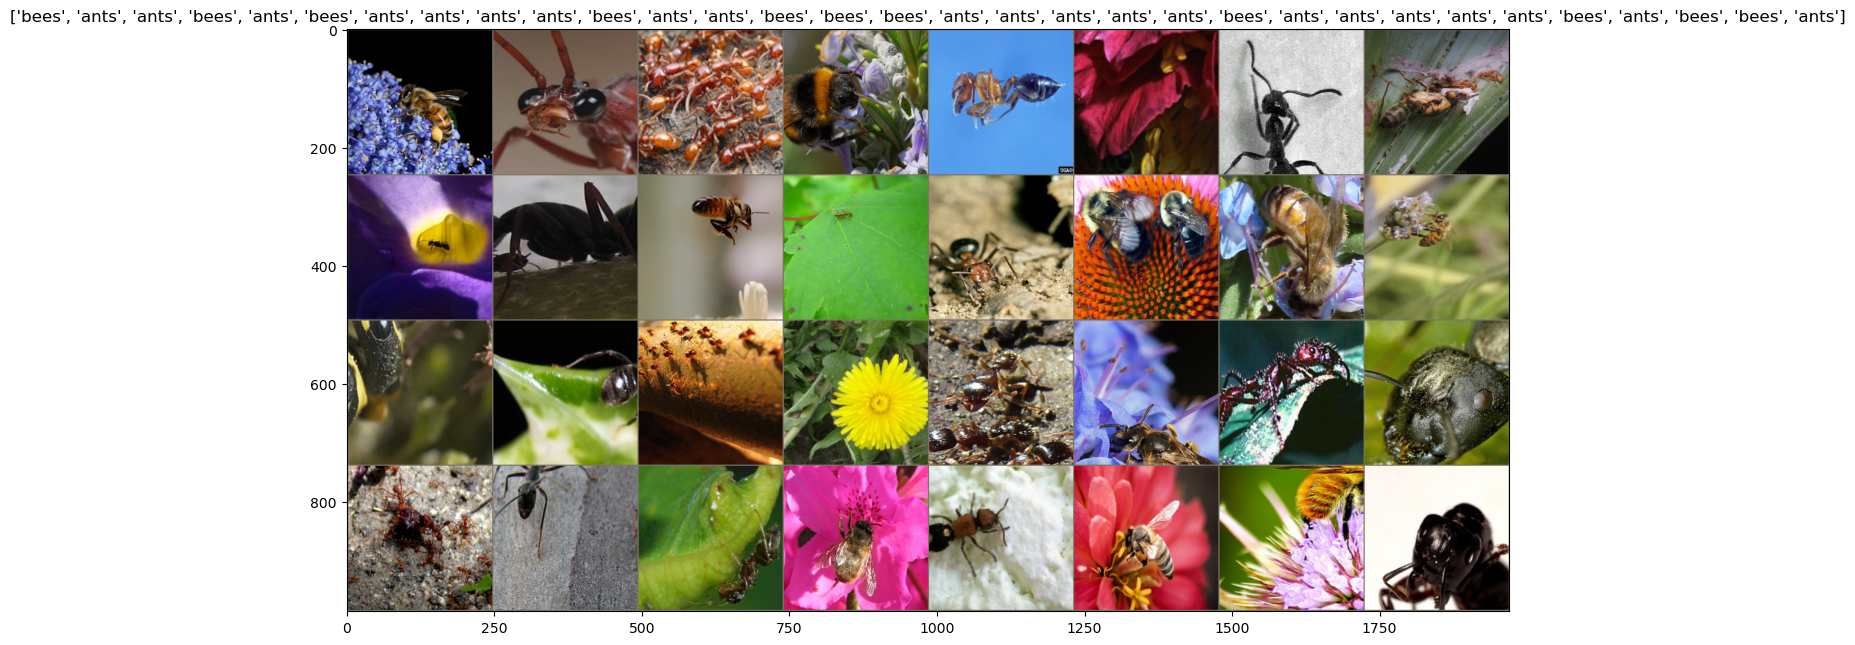

In [3]:
from matplotlib import pyplot as plt

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(15, 12))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


# Получим 1 батч (картнки-метки) из обучающей выборки
inputs, classes = next(iter(loaders['train']))

# Расположим картинки рядом
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [4]:
image_datasets["train"][0]

(tensor([[[-0.7308, -0.7308, -0.6794,  ..., -0.7993, -0.7993, -0.7993],
          [-0.7308, -0.7137, -0.6794,  ..., -0.7993, -0.7993, -0.7993],
          [-0.6794, -0.6794, -0.6623,  ..., -0.7993, -0.7993, -0.7993],
          ...,
          [-0.6109, -0.6109, -0.6281,  ...,  0.6734, -1.9809, -2.0837],
          [-0.6281, -0.6281, -0.6281,  ...,  1.2728, -0.3883, -1.3130],
          [-0.6281, -0.6281, -0.6109,  ...,  1.3242,  1.1358, -0.5938]],
 
         [[ 0.6254,  0.6254,  0.6254,  ...,  0.5378,  0.5378,  0.5378],
          [ 0.6254,  0.6429,  0.6254,  ...,  0.5378,  0.5378,  0.5378],
          [ 0.6779,  0.6779,  0.6429,  ...,  0.5378,  0.5378,  0.5378],
          ...,
          [ 0.7479,  0.7479,  0.7654,  ...,  0.8179, -1.8957, -2.0007],
          [ 0.7304,  0.7304,  0.7654,  ...,  1.4307, -0.2675, -1.2129],
          [ 0.7304,  0.7304,  0.7654,  ...,  1.4482,  1.2556, -0.4951]],
 
         [[ 2.2740,  2.2740,  2.2914,  ...,  2.2391,  2.2391,  2.2391],
          [ 2.2740,  2.2914,

### Обучение моделей

Следующая функция будет использоваться для обучения модели. Аргументы:  
* model $-$ нейросеть
* loss $-$ оптимизируемая функция (criterion, cost function, objective)
* optimizer $-$ оптимизационный алгоритм
* scheduler $-$ политика изменения learning_rate
* num_epochs $-$ количество итераций обучения

In [5]:
from catalyst import dl, metrics
from torch.nn import functional as F

class ImgRunner(dl.Runner):

    def predict_batch(self, batch):
        # model inference step
        return self.model(batch[0].to(self.device).view(batch[0].size(0), -1))

    def handle_batch(self, batch):
        # model train/valid step
        x, y = batch
        y_hat = self.model(x)

        self.batch = {
            "features": x,
            "targets": y,
            "logits": y_hat,
        }

    
        
        

### Задание

Для каждой из следующих нейросетей:
* **AlexNet** (уже сделано в примере)
* **VGG16**
* **Inception_v3**

Напишите код и выведите результат (график лосса, accuracy и вывод примера классификации картинок с визализацией (с помощью функции `vizualize_model()`)) для трёх способов:
* Использование готовой нейросети **"из коробки"**
* Использование нейросети как **Feature Extractor**
* **Fine Tuning** нейросети

Для каждого пункта нужно:
* сделать с сетью то, что нужно в пункте ("из коробки", FE или FT)
* вывести график loss'а на обучающей и на валидационной выборке
* вывести качество модели (accuracy) на валидационной (тестовой) выборке
* (по желанию) использовать функцию visualize_model()

### AlexNet

*ПРИМЕЧАНИЕ: Здесь не выведены графики loss'а и не использована visualize_model(). От Вас это ожидается.*

Загрузка модели:

In [6]:
model = models.alexnet(pretrained=True)

c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Посмотрим, что внутри:

In [7]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Видим, что на вход классификатору (classifier) подаётся *9216 признаков*. Это и будет размер входа для нашего нового классификатора.

* **Fine Tuning** способ

Сконфигурируем - изменим FC-слой и зададим *cost function* и *оптимизирующий алгоритм*:

(*по умолчанию backpropagation распространяется на все слои, поэтому здесь мы только заменяем FC-слой на свой классификатор*)

In [58]:
!rm -rf logs

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096
# Заменяем Fully-Connected слой на наш линейный классификатор
model.classifier[6] = nn.Linear(num_features, 2)
if use_gpu:
    model = model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [13]:

%reload_ext tensorboard
%tensorboard --logdir "stepik/tranfer learning/logs" 

Reusing TensorBoard on port 6007 (pid 20348), started 0:47:13 ago. (Use '!kill 20348' to kill it.)

In [9]:
runner = ImgRunner()
runner.train(
    model=model,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss"),
        dl.OptimizerCallback(metric_key="loss"),
        dl.AccuracyCallback(input_key="logits", target_key="targets")
    ],
    loaders=loaders,
    num_epochs=20,
    verbose=True,
    valid_loader="valid",
    valid_metric="accuracy01",
    minimize_valid_metric=False,
    logdir="logs/alexnet"
)

1/20 * Epoch (train):  12%|█▎        | 1/8 [00:01<00:12,  1.72s/it, accuracy=0.406, accuracy01=0.406, loss=0.822, lr=1.000e-04, momentum=0.900]c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\catalyst\core\runner.py:716: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  k: runner.engine.sync_tensor(torch.tensor(v, device=runner.device), "mean")
1/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.18it/s, accuracy=0.750, accuracy01=0.750, loss=0.641, lr=1.000e-04, momentum=0.900]


train (1/20) accuracy: 0.7295082211494446 | accuracy/std: 0.13308295911427337 | accuracy01: 0.7295082211494446 | accuracy01/std: 0.13308295911427337 | loss: 0.5432980060577393 | loss/mean: 0.5432980060577393 | loss/std: 0.13067869414562358 | lr: 0.0001 | momentum: 0.9


1/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s, accuracy=0.720, accuracy01=0.720, loss=0.724, lr=1.000e-04, momentum=0.900]


valid (1/20) accuracy: 0.8954248428344727 | accuracy/std: 0.07778217550010579 | accuracy01: 0.8954248428344727 | accuracy01/std: 0.07778217550010579 | loss: 0.32233309745788574 | loss/mean: 0.32233309745788574 | loss/std: 0.17789418089970147 | lr: 0.0001 | momentum: 0.9
* Epoch (1/20) 


2/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s, accuracy=0.800, accuracy01=0.800, loss=0.620, lr=1.000e-04, momentum=0.900]


train (2/20) accuracy: 0.8647540807723999 | accuracy/std: 0.03163157347382462 | accuracy01: 0.8647540807723999 | accuracy01/std: 0.03163157347382462 | loss: 0.3588355481624603 | loss/mean: 0.3588355481624603 | loss/std: 0.1262859920341983 | lr: 0.0001 | momentum: 0.9


2/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s, accuracy=0.880, accuracy01=0.880, loss=0.281, lr=1.000e-04, momentum=0.900]


valid (2/20) accuracy: 0.9019607901573181 | accuracy/std: 0.009737262240101772 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.009737262240101772 | loss: 0.28515878319740295 | loss/mean: 0.28515878319740295 | loss/std: 0.001633161847576161 | lr: 0.0001 | momentum: 0.9
* Epoch (2/20) 


3/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s, accuracy=0.900, accuracy01=0.900, loss=0.233, lr=1.000e-04, momentum=0.900]


train (3/20) accuracy: 0.8975409865379333 | accuracy/std: 0.04156281347202479 | accuracy01: 0.8975409865379333 | accuracy01/std: 0.04156281347202479 | loss: 0.2857274115085602 | loss/mean: 0.2857274115085602 | loss/std: 0.02678368540141232 | lr: 0.0001 | momentum: 0.9


3/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s, accuracy=0.920, accuracy01=0.920, loss=0.215, lr=1.000e-04, momentum=0.900]


valid (3/20) accuracy: 0.8823529481887817 | accuracy/std: 0.0166924306030822 | accuracy01: 0.8823529481887817 | accuracy01/std: 0.0166924306030822 | loss: 0.3196086883544922 | loss/mean: 0.3196086883544922 | loss/std: 0.04660331707562604 | lr: 0.0001 | momentum: 0.9
* Epoch (3/20) 


4/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.93it/s, accuracy=0.950, accuracy01=0.950, loss=0.124, lr=1.000e-04, momentum=0.900]


train (4/20) accuracy: 0.9016393423080444 | accuracy/std: 0.037712047350549255 | accuracy01: 0.9016393423080444 | accuracy01/std: 0.037712047350549255 | loss: 0.22733283042907715 | loss/mean: 0.22733283042907715 | loss/std: 0.0801321706941158 | lr: 0.0001 | momentum: 0.9


4/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s, accuracy=0.840, accuracy01=0.840, loss=0.568, lr=1.000e-04, momentum=0.900]


valid (4/20) accuracy: 0.9019607901573181 | accuracy/std: 0.027472994629560255 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.027472994629560255 | loss: 0.28686273097991943 | loss/mean: 0.28686273097991943 | loss/std: 0.12465206107950288 | lr: 0.0001 | momentum: 0.9
* Epoch (4/20) 


5/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.91it/s, accuracy=0.950, accuracy01=0.950, loss=0.170, lr=1.000e-04, momentum=0.900]


train (5/20) accuracy: 0.9344262480735779 | accuracy/std: 0.04946502545882258 | accuracy01: 0.9344262480735779 | accuracy01/std: 0.04946502545882258 | loss: 0.16637592017650604 | loss/mean: 0.16637592017650604 | loss/std: 0.07391167939382977 | lr: 0.0001 | momentum: 0.9


5/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s, accuracy=0.920, accuracy01=0.920, loss=0.227, lr=1.000e-04, momentum=0.900]


valid (5/20) accuracy: 0.8888888955116272 | accuracy/std: 0.013794436415193343 | accuracy01: 0.8888888955116272 | accuracy01/std: 0.013794436415193343 | loss: 0.2725822627544403 | loss/mean: 0.2725822627544403 | loss/std: 0.02034142210224213 | lr: 0.0001 | momentum: 0.9
* Epoch (5/20) 


6/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.91it/s, accuracy=0.900, accuracy01=0.900, loss=0.184, lr=1.000e-04, momentum=0.900]


train (6/20) accuracy: 0.9713114500045776 | accuracy/std: 0.029947156879623963 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.029947156879623963 | loss: 0.11063508689403534 | loss/mean: 0.11063508689403534 | loss/std: 0.040529548984415006 | lr: 0.0001 | momentum: 0.9


6/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s, accuracy=0.840, accuracy01=0.840, loss=0.626, lr=1.000e-04, momentum=0.900]


valid (6/20) accuracy: 0.9084967374801636 | accuracy/std: 0.03037098881744909 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.03037098881744909 | loss: 0.3434298634529114 | loss/mean: 0.3434298634529114 | loss/std: 0.12508139744149457 | lr: 0.0001 | momentum: 0.9
* Epoch (6/20) 


7/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.30it/s, accuracy=0.900, accuracy01=0.900, loss=0.386, lr=1.000e-04, momentum=0.900]


train (7/20) accuracy: 0.9631147384643555 | accuracy/std: 0.04359289294393946 | accuracy01: 0.9631147384643555 | accuracy01/std: 0.04359289294393946 | loss: 0.11320896446704865 | loss/mean: 0.11320896446704865 | loss/std: 0.09535961475145052 | lr: 0.0001 | momentum: 0.9


7/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s, accuracy=0.880, accuracy01=0.880, loss=0.410, lr=1.000e-04, momentum=0.900]


valid (7/20) accuracy: 0.9019607901573181 | accuracy/std: 0.009737262240101772 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.009737262240101772 | loss: 0.33315926790237427 | loss/mean: 0.33315926790237427 | loss/std: 0.03404671123528852 | lr: 0.0001 | momentum: 0.9
* Epoch (7/20) 


8/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s, accuracy=1.000, accuracy01=1.000, loss=0.014, lr=1.000e-04, momentum=0.900]


train (8/20) accuracy: 0.9549180269241333 | accuracy/std: 0.025687930958666023 | accuracy01: 0.9549180269241333 | accuracy01/std: 0.025687930958666023 | loss: 0.15115778148174286 | loss/mean: 0.15115778148174286 | loss/std: 0.090782196289271 | lr: 0.0001 | momentum: 0.9


8/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s, accuracy=0.880, accuracy01=0.880, loss=0.325, lr=1.000e-04, momentum=0.900]


valid (8/20) accuracy: 0.9084967374801636 | accuracy/std: 0.01263525642799063 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.01263525642799063 | loss: 0.3160442113876343 | loss/mean: 0.3160442113876343 | loss/std: 0.004000285296876253 | lr: 0.0001 | momentum: 0.9
* Epoch (8/20) 


9/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s, accuracy=0.900, accuracy01=0.900, loss=0.359, lr=1.000e-04, momentum=0.900]


train (9/20) accuracy: 0.9713114500045776 | accuracy/std: 0.029947156879623935 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.029947156879623935 | loss: 0.10893645137548447 | loss/mean: 0.10893645137548447 | loss/std: 0.08327188169032633 | lr: 0.0001 | momentum: 0.9


9/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s, accuracy=0.840, accuracy01=0.840, loss=0.427, lr=1.000e-04, momentum=0.900]


valid (9/20) accuracy: 0.9084967374801636 | accuracy/std: 0.03037098881744909 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.03037098881744909 | loss: 0.3066406846046448 | loss/mean: 0.3066406846046448 | loss/std: 0.053177437187777704 | lr: 0.0001 | momentum: 0.9
* Epoch (9/20) 


10/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.21it/s, accuracy=1.000, accuracy01=1.000, loss=0.003, lr=1.000e-04, momentum=0.900]


train (10/20) accuracy: 0.9836065769195557 | accuracy/std: 0.03187722263747267 | accuracy01: 0.9836065769195557 | accuracy01/std: 0.03187722263747267 | loss: 0.0628441795706749 | loss/mean: 0.0628441795706749 | loss/std: 0.04005592530009253 | lr: 0.0001 | momentum: 0.9


10/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s, accuracy=0.840, accuracy01=0.840, loss=0.675, lr=1.000e-04, momentum=0.900]


valid (10/20) accuracy: 0.9019607901573181 | accuracy/std: 0.027472994629560255 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.027472994629560255 | loss: 0.3558046519756317 | loss/mean: 0.3558046519756317 | loss/std: 0.14142463469125627 | lr: 0.0001 | momentum: 0.9
* Epoch (10/20) 


11/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s, accuracy=1.000, accuracy01=1.000, loss=0.023, lr=1.000e-04, momentum=0.900]


train (11/20) accuracy: 0.9467213153839111 | accuracy/std: 0.04062915944798646 | accuracy01: 0.9467213153839111 | accuracy01/std: 0.04062915944798646 | loss: 0.10583356767892838 | loss/mean: 0.10583356767892838 | loss/std: 0.06749067010424485 | lr: 0.0001 | momentum: 0.9


11/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s, accuracy=0.880, accuracy01=0.880, loss=0.277, lr=1.000e-04, momentum=0.900]


valid (11/20) accuracy: 0.8888888955116272 | accuracy/std: 0.003941273864324102 | accuracy01: 0.8888888955116272 | accuracy01/std: 0.003941273864324102 | loss: 0.3739873468875885 | loss/mean: 0.3739873468875885 | loss/std: 0.0428280280659393 | lr: 0.0001 | momentum: 0.9
* Epoch (11/20) 


12/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s, accuracy=1.000, accuracy01=1.000, loss=0.021, lr=1.000e-04, momentum=0.900]


train (12/20) accuracy: 0.9918032884597778 | accuracy/std: 0.013774575102235127 | accuracy01: 0.9918032884597778 | accuracy01/std: 0.013774575102235127 | loss: 0.04414438456296921 | loss/mean: 0.04414438456296921 | loss/std: 0.0251064840397375 | lr: 0.0001 | momentum: 0.9


12/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s, accuracy=0.880, accuracy01=0.880, loss=0.626, lr=1.000e-04, momentum=0.900]


valid (12/20) accuracy: 0.915032684803009 | accuracy/std: 0.015533250615879464 | accuracy01: 0.915032684803009 | accuracy01/std: 0.015533250615879464 | loss: 0.4167701303958893 | loss/mean: 0.4167701303958893 | loss/std: 0.09297922235300736 | lr: 0.0001 | momentum: 0.9
* Epoch (12/20) 


13/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.71it/s, accuracy=1.000, accuracy01=1.000, loss=0.002, lr=1.000e-04, momentum=0.900]


train (13/20) accuracy: 0.9672130942344666 | accuracy/std: 0.03127634152565766 | accuracy01: 0.9672130942344666 | accuracy01/std: 0.03127634152565766 | loss: 0.07970833778381348 | loss/mean: 0.07970833778381348 | loss/std: 0.049098821794313664 | lr: 0.0001 | momentum: 0.9


13/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s, accuracy=0.880, accuracy01=0.880, loss=0.635, lr=1.000e-04, momentum=0.900]


valid (13/20) accuracy: 0.9019607901573181 | accuracy/std: 0.009737262240101772 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.009737262240101772 | loss: 0.45879673957824707 | loss/mean: 0.45879673957824707 | loss/std: 0.07812574187343956 | lr: 0.0001 | momentum: 0.9
* Epoch (13/20) 


14/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.88it/s, accuracy=0.950, accuracy01=0.950, loss=0.064, lr=1.000e-04, momentum=0.900]


train (14/20) accuracy: 0.9877049326896667 | accuracy/std: 0.01764006523665293 | accuracy01: 0.9877049326896667 | accuracy01/std: 0.01764006523665293 | loss: 0.042195238173007965 | loss/mean: 0.042195238173007965 | loss/std: 0.02327104563806764 | lr: 0.0001 | momentum: 0.9


14/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s, accuracy=0.840, accuracy01=0.840, loss=1.011, lr=1.000e-04, momentum=0.900]


valid (14/20) accuracy: 0.8888888955116272 | accuracy/std: 0.021677006253782563 | accuracy01: 0.8888888955116272 | accuracy01/std: 0.021677006253782563 | loss: 0.5591273307800293 | loss/mean: 0.5591273307800293 | loss/std: 0.20020152498918553 | lr: 0.0001 | momentum: 0.9
* Epoch (14/20) 


15/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.06it/s, accuracy=0.900, accuracy01=0.900, loss=0.126, lr=1.000e-04, momentum=0.900]


train (15/20) accuracy: 0.9795082211494446 | accuracy/std: 0.03231728441391209 | accuracy01: 0.9795082211494446 | accuracy01/std: 0.03231728441391209 | loss: 0.050831522792577744 | loss/mean: 0.050831522792577744 | loss/std: 0.056501683843655705 | lr: 0.0001 | momentum: 0.9


15/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s, accuracy=0.840, accuracy01=0.840, loss=1.263, lr=1.000e-04, momentum=0.900]


valid (15/20) accuracy: 0.9019607901573181 | accuracy/std: 0.027472994629560255 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.027472994629560255 | loss: 0.587779700756073 | loss/mean: 0.587779700756073 | loss/std: 0.2993169856001531 | lr: 0.0001 | momentum: 0.9
* Epoch (15/20) 


16/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.13it/s, accuracy=0.950, accuracy01=0.950, loss=0.097, lr=1.000e-04, momentum=0.900]


train (16/20) accuracy: 0.9713114500045776 | accuracy/std: 0.020202711184938795 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.020202711184938795 | loss: 0.09402308613061905 | loss/mean: 0.09402308613061905 | loss/std: 0.11151973147446262 | lr: 0.0001 | momentum: 0.9


16/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s, accuracy=0.880, accuracy01=0.880, loss=0.583, lr=1.000e-04, momentum=0.900]


valid (16/20) accuracy: 0.9019607901573181 | accuracy/std: 0.009737262240101772 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.009737262240101772 | loss: 0.4535352289676666 | loss/mean: 0.4535352289676666 | loss/std: 0.05746320604295796 | lr: 0.0001 | momentum: 0.9
* Epoch (16/20) 


17/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.68it/s, accuracy=1.000, accuracy01=1.000, loss=0.043, lr=1.000e-04, momentum=0.900]


train (17/20) accuracy: 0.9754098653793335 | accuracy/std: 0.02605462893349094 | accuracy01: 0.9754098653793335 | accuracy01/std: 0.02605462893349094 | loss: 0.046395983546972275 | loss/mean: 0.046395983546972275 | loss/std: 0.036877424245116246 | lr: 0.0001 | momentum: 0.9


17/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s, accuracy=0.800, accuracy01=0.800, loss=0.864, lr=1.000e-04, momentum=0.900]


valid (17/20) accuracy: 0.8823529481887817 | accuracy/std: 0.03651474445535219 | accuracy01: 0.8823529481887817 | accuracy01/std: 0.03651474445535219 | loss: 0.4533555805683136 | loss/mean: 0.4533555805683136 | loss/std: 0.18214581753344958 | lr: 0.0001 | momentum: 0.9
* Epoch (17/20) 


18/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.50it/s, accuracy=1.000, accuracy01=1.000, loss=0.049, lr=1.000e-04, momentum=0.900]


train (18/20) accuracy: 0.9713114500045776 | accuracy/std: 0.029075630616662376 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.029075630616662376 | loss: 0.08645738661289215 | loss/mean: 0.08645738661289215 | loss/std: 0.08518600384675627 | lr: 0.0001 | momentum: 0.9


18/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s, accuracy=0.920, accuracy01=0.920, loss=0.160, lr=1.000e-04, momentum=0.900]


valid (18/20) accuracy: 0.8692810535430908 | accuracy/std: 0.02248841897885987 | accuracy01: 0.8692810535430908 | accuracy01/std: 0.02248841897885987 | loss: 0.5598517060279846 | loss/mean: 0.5598517060279846 | loss/std: 0.17738232471038018 | lr: 0.0001 | momentum: 0.9
* Epoch (18/20) 


19/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.16it/s, accuracy=1.000, accuracy01=1.000, loss=0.038, lr=1.000e-04, momentum=0.900]


train (19/20) accuracy: 0.9508196711540222 | accuracy/std: 0.04106784838636516 | accuracy01: 0.9508196711540222 | accuracy01/std: 0.04106784838636516 | loss: 0.10369591414928436 | loss/mean: 0.10369591414928436 | loss/std: 0.07495687405865384 | lr: 0.0001 | momentum: 0.9


19/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s, accuracy=0.960, accuracy01=0.960, loss=0.164, lr=1.000e-04, momentum=0.900]


valid (19/20) accuracy: 0.8954248428344727 | accuracy/std: 0.028632174616762967 | accuracy01: 0.8954248428344727 | accuracy01/std: 0.028632174616762967 | loss: 0.5211277604103088 | loss/mean: 0.5211277604103088 | loss/std: 0.1584701555247617 | lr: 0.0001 | momentum: 0.9
* Epoch (19/20) 


20/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.98it/s, accuracy=1.000, accuracy01=1.000, loss=0.013, lr=1.000e-04, momentum=0.900]


train (20/20) accuracy: 0.9713114500045776 | accuracy/std: 0.036875406274882755 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.036875406274882755 | loss: 0.0726718008518219 | loss/mean: 0.0726718008518219 | loss/std: 0.055438387199211216 | lr: 0.0001 | momentum: 0.9


20/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s, accuracy=0.760, accuracy01=0.760, loss=0.909, lr=1.000e-04, momentum=0.900]


valid (20/20) accuracy: 0.9019607901573181 | accuracy/std: 0.06294443729853616 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.06294443729853616 | loss: 0.4371500015258789 | loss/mean: 0.4371500015258789 | loss/std: 0.20911409748463433 | lr: 0.0001 | momentum: 0.9
* Epoch (20/20) 
Top best models:
logs\alexnet\checkpoints/train.12.pth	0.9150


* **Feature Extractor** способ:

In [15]:
model_extractor = models.alexnet(pretrained=True)

Помним, что по-умолчанию все слои нейросети обучаются заново:

In [16]:
for param in model_extractor.parameters():
    print(param.requires_grad)
    break

True


Сделаем так, чтобы на них *не распространялся backpropagation* (заморозим их), и подменим классификатор (ведь старый уже с весами для ImageNet'а).

In [17]:
# замораживаем параметры (веса)
for param in model_extractor.parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.classifier[6] = nn.Linear(num_features, 2)

# Обучаем только классификатор
optimizer = optim.Adam(model_extractor.classifier[6].parameters(), lr=1e-4)

In [1]:
runner = ImgRunner()

runner.train(
    model=model_extractor,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss"),
        dl.OptimizerCallback(metric_key="loss"),
        dl.AccuracyCallback(input_key="logits", target_key="targets")
    ],
    loaders=loaders,
    num_epochs=20,
    verbose=True,
    valid_loader="valid",
    valid_metric="accuracy01",
    minimize_valid_metric=False,
    logdir="logs/alexnet"
)

NameError: name 'ImgRunner' is not defined

* **Смешанный** способ:
Мы будем обучать не только последний **fully connected** слой, но и несколько предпоследних

In [19]:
model_mixed = models.alexnet(pretrained=True)

In [20]:
model_mixed

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [22]:
from itertools import chain

layers_to_unfreeze = 5

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model_mixed.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096
# Заменяем Fully-Connected слой на наш линейный классификатор
model_mixed.classifier[6] = nn.Linear(num_features, 2)

# Обучаем последние layers_to_unfreeze слоев из сверточной части и fully connected слой
# parameters() возвращает просто список тензоров парамтеров, поэтому два таких списка можно сложить
optimizer = torch.optim.Adam(
    chain(
        list(model_mixed.features.parameters())[-layers_to_unfreeze:],
        model_mixed.classifier.parameters()
    ),
    lr=1e-4,
)

In [38]:
runner = ImgRunner()

runner.train(
    model=model_mixed,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss"),
        dl.OptimizerCallback(metric_key="loss"),
        dl.AccuracyCallback(input_key="logits", target_key="targets")
    ],
    loaders=loaders,
    num_epochs=20,
    verbose=True,
    valid_loader="valid",
    valid_metric="accuracy01",
    minimize_valid_metric=False,
   
    logdir="logs/alexnet_mixed"
)

1/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s, accuracy=0.450, accuracy01=0.450, loss=0.908, lr=1.000e-04, momentum=0.900]


train (1/20) accuracy: 0.41803279519081116 | accuracy/std: 0.05571849293564177 | accuracy01: 0.41803279519081116 | accuracy01/std: 0.05571849293564177 | loss: 0.8652283549308777 | loss/mean: 0.8652283549308777 | loss/std: 0.05647211809409971 | lr: 0.0001 | momentum: 0.9


1/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (1/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (1/20) 


2/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s, accuracy=0.450, accuracy01=0.450, loss=0.751, lr=1.000e-04, momentum=0.900]


train (2/20) accuracy: 0.42213115096092224 | accuracy/std: 0.05810774096919807 | accuracy01: 0.42213115096092224 | accuracy01/std: 0.05810774096919807 | loss: 0.8574392795562744 | loss/mean: 0.8574392795562744 | loss/std: 0.07711354528191555 | lr: 0.0001 | momentum: 0.9


2/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (2/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (2/20) 


3/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.84it/s, accuracy=0.550, accuracy01=0.550, loss=0.817, lr=1.000e-04, momentum=0.900]


train (3/20) accuracy: 0.3893442749977112 | accuracy/std: 0.08177040925372686 | accuracy01: 0.3893442749977112 | accuracy01/std: 0.08177040925372686 | loss: 0.9041991829872131 | loss/mean: 0.9041991829872131 | loss/std: 0.09611868976956135 | lr: 0.0001 | momentum: 0.9


3/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (3/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (3/20) 


4/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s, accuracy=0.250, accuracy01=0.250, loss=1.045, lr=1.000e-04, momentum=0.900]


train (4/20) accuracy: 0.41803279519081116 | accuracy/std: 0.07040172024018618 | accuracy01: 0.41803279519081116 | accuracy01/std: 0.07040172024018618 | loss: 0.8644075393676758 | loss/mean: 0.8644075393676758 | loss/std: 0.08760010059951841 | lr: 0.0001 | momentum: 0.9


4/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (4/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (4/20) 


5/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.67it/s, accuracy=0.500, accuracy01=0.500, loss=0.746, lr=1.000e-04, momentum=0.900]


train (5/20) accuracy: 0.4549180269241333 | accuracy/std: 0.08266020386564524 | accuracy01: 0.4549180269241333 | accuracy01/std: 0.08266020386564524 | loss: 0.8316015601158142 | loss/mean: 0.8316015601158142 | loss/std: 0.08183811938215133 | lr: 0.0001 | momentum: 0.9


5/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (5/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (5/20) 


6/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.31it/s, accuracy=0.400, accuracy01=0.400, loss=0.786, lr=1.000e-04, momentum=0.900]


train (6/20) accuracy: 0.4139344394207001 | accuracy/std: 0.09182361306127827 | accuracy01: 0.4139344394207001 | accuracy01/std: 0.09182361306127827 | loss: 0.8608078956604004 | loss/mean: 0.8608078956604004 | loss/std: 0.10838268527294455 | lr: 0.0001 | momentum: 0.9


6/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (6/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (6/20) 


7/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.23it/s, accuracy=0.200, accuracy01=0.200, loss=0.949, lr=1.000e-04, momentum=0.900]


train (7/20) accuracy: 0.37704917788505554 | accuracy/std: 0.06371475104673294 | accuracy01: 0.37704917788505554 | accuracy01/std: 0.06371475104673294 | loss: 0.880242645740509 | loss/mean: 0.880242645740509 | loss/std: 0.054070195082237135 | lr: 0.0001 | momentum: 0.9


7/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (7/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (7/20) 


8/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.79it/s, accuracy=0.400, accuracy01=0.400, loss=0.844, lr=1.000e-04, momentum=0.900]


train (8/20) accuracy: 0.4057376980781555 | accuracy/std: 0.07351316927307046 | accuracy01: 0.4057376980781555 | accuracy01/std: 0.07351316927307046 | loss: 0.8588917255401611 | loss/mean: 0.8588917255401611 | loss/std: 0.07139031839201736 | lr: 0.0001 | momentum: 0.9


8/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (8/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (8/20) 


9/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.13it/s, accuracy=0.550, accuracy01=0.550, loss=0.902, lr=1.000e-04, momentum=0.900]


train (9/20) accuracy: 0.46311476826667786 | accuracy/std: 0.07772571877649302 | accuracy01: 0.46311476826667786 | accuracy01/std: 0.07772571877649302 | loss: 0.8413671851158142 | loss/mean: 0.8413671851158142 | loss/std: 0.07348773912053211 | lr: 0.0001 | momentum: 0.9


9/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (9/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (9/20) 


10/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.12it/s, accuracy=0.250, accuracy01=0.250, loss=0.943, lr=1.000e-04, momentum=0.900]


train (10/20) accuracy: 0.4057376980781555 | accuracy/std: 0.09256222938712211 | accuracy01: 0.4057376980781555 | accuracy01/std: 0.09256222938712211 | loss: 0.8786407709121704 | loss/mean: 0.8786407709121704 | loss/std: 0.07294784099358122 | lr: 0.0001 | momentum: 0.9


10/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (10/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (10/20) 


11/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.19it/s, accuracy=0.400, accuracy01=0.400, loss=0.801, lr=1.000e-04, momentum=0.900]


train (11/20) accuracy: 0.44672131538391113 | accuracy/std: 0.07456670552053105 | accuracy01: 0.44672131538391113 | accuracy01/std: 0.07456670552053105 | loss: 0.822758138179779 | loss/mean: 0.822758138179779 | loss/std: 0.05339395034563438 | lr: 0.0001 | momentum: 0.9


11/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (11/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (11/20) 


12/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s, accuracy=0.450, accuracy01=0.450, loss=0.853, lr=1.000e-04, momentum=0.900]


train (12/20) accuracy: 0.4303278625011444 | accuracy/std: 0.05520533255995476 | accuracy01: 0.4303278625011444 | accuracy01/std: 0.05520533255995476 | loss: 0.8618260025978088 | loss/mean: 0.8618260025978088 | loss/std: 0.0789681763410849 | lr: 0.0001 | momentum: 0.9


12/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (12/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (12/20) 


13/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.06it/s, accuracy=0.300, accuracy01=0.300, loss=0.970, lr=1.000e-04, momentum=0.900]


train (13/20) accuracy: 0.41803279519081116 | accuracy/std: 0.06911122071631483 | accuracy01: 0.41803279519081116 | accuracy01/std: 0.06911122071631483 | loss: 0.8683277368545532 | loss/mean: 0.8683277368545532 | loss/std: 0.08945160866542115 | lr: 0.0001 | momentum: 0.9


13/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (13/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (13/20) 


14/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.97it/s, accuracy=0.400, accuracy01=0.400, loss=0.856, lr=1.000e-04, momentum=0.900]


train (14/20) accuracy: 0.4057376980781555 | accuracy/std: 0.0893095880489685 | accuracy01: 0.4057376980781555 | accuracy01/std: 0.0893095880489685 | loss: 0.8411951065063477 | loss/mean: 0.8411951065063477 | loss/std: 0.0779343876791889 | lr: 0.0001 | momentum: 0.9


14/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (14/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (14/20) 


15/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.81it/s, accuracy=0.400, accuracy01=0.400, loss=0.789, lr=1.000e-04, momentum=0.900]


train (15/20) accuracy: 0.41803279519081116 | accuracy/std: 0.0391869914905511 | accuracy01: 0.41803279519081116 | accuracy01/std: 0.0391869914905511 | loss: 0.8699464201927185 | loss/mean: 0.8699464201927185 | loss/std: 0.057062745106323906 | lr: 0.0001 | momentum: 0.9


15/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (15/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (15/20) 


16/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.13it/s, accuracy=0.350, accuracy01=0.350, loss=0.971, lr=1.000e-04, momentum=0.900]


train (16/20) accuracy: 0.3893442749977112 | accuracy/std: 0.0724297613882847 | accuracy01: 0.3893442749977112 | accuracy01/std: 0.0724297613882847 | loss: 0.8621801733970642 | loss/mean: 0.8621801733970642 | loss/std: 0.09231143060146893 | lr: 0.0001 | momentum: 0.9


16/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (16/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (16/20) 


17/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.96it/s, accuracy=0.500, accuracy01=0.500, loss=0.817, lr=1.000e-04, momentum=0.900]


train (17/20) accuracy: 0.3893442749977112 | accuracy/std: 0.0747022920403321 | accuracy01: 0.3893442749977112 | accuracy01/std: 0.0747022920403321 | loss: 0.8575152158737183 | loss/mean: 0.8575152158737183 | loss/std: 0.06966846310452812 | lr: 0.0001 | momentum: 0.9


17/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (17/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (17/20) 


18/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.98it/s, accuracy=0.300, accuracy01=0.300, loss=0.890, lr=1.000e-04, momentum=0.900]


train (18/20) accuracy: 0.40163934230804443 | accuracy/std: 0.08933554939737218 | accuracy01: 0.40163934230804443 | accuracy01/std: 0.08933554939737218 | loss: 0.8506723046302795 | loss/mean: 0.8506723046302795 | loss/std: 0.08344111426125564 | lr: 0.0001 | momentum: 0.9


18/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (18/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (18/20) 


19/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.92it/s, accuracy=0.350, accuracy01=0.350, loss=0.832, lr=1.000e-04, momentum=0.900]


train (19/20) accuracy: 0.4303278625011444 | accuracy/std: 0.04317987021690079 | accuracy01: 0.4303278625011444 | accuracy01/std: 0.04317987021690079 | loss: 0.8699170351028442 | loss/mean: 0.8699170351028442 | loss/std: 0.05544846920296552 | lr: 0.0001 | momentum: 0.9


19/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (19/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (19/20) 


20/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s, accuracy=0.250, accuracy01=0.250, loss=0.964, lr=1.000e-04, momentum=0.900]


train (20/20) accuracy: 0.3606557250022888 | accuracy/std: 0.08885520384813643 | accuracy01: 0.3606557250022888 | accuracy01/std: 0.08885520384813643 | loss: 0.874977171421051 | loss/mean: 0.874977171421051 | loss/std: 0.06656106941201759 | lr: 0.0001 | momentum: 0.9


20/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s, accuracy=0.320, accuracy01=0.320, loss=1.125, lr=1.000e-04, momentum=0.900]


valid (20/20) accuracy: 0.3660130798816681 | accuracy/std: 0.02040188173593035 | accuracy01: 0.3660130798816681 | accuracy01/std: 0.02040188173593035 | loss: 0.919658362865448 | loss/mean: 0.919658362865448 | loss/std: 0.09104648185973416 | lr: 0.0001 | momentum: 0.9
* Epoch (20/20) 
Top best models:
logs\alexnet_mixed\checkpoints/train.1.pth	0.3660


**Вопрос 1 (важный):** С чем связано повышение качества если мы перестаем учить всю сеть? (Подсказка: посмотрите на датасет и на то, как он согласуется с 4-мя ситуациями, описанными выше)

**Ответ (важный):** <Ваш ответ>

**Вопрос 2**: Почему разморозка последних слоев не дает прироста к точности, хотя разморозить несколько послдних слоев обычно хорошеее решение для классификации похожего датасета? (Вопрос на внимательность)

**Ответ:** <Ваш ответ>

### Бонус

Существует еще один интересный способ. Мы не хотим, чтобы ядра в свертках сильно менялись во время обучения, а еще мы знаем, что чем меньше lr, тем меньше изменения. Давайте уменьшим lr на feature extractor-е! Разберемся как это сделать...

In [24]:
model_mixed_lr = models.alexnet(pretrained=True)

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096
# Заменяем Fully-Connected слой на наш линейный классификатор
model_mixed.classifier[6] = nn.Linear(num_features, 2)


c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [25]:
optimizer = torch.optim.Adam(
    (
        {
            "params": model_mixed_lr.features.parameters(),
            "lr": 1e-6,
        },
        {
            "params": model_mixed_lr.classifier.parameters(),
        }
     ),
     lr=1e-4
)

In [39]:
runner = ImgRunner()

runner.train(
    model=model_mixed_lr,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss"),
        dl.OptimizerCallback(metric_key="loss"),
        dl.AccuracyCallback(input_key="logits", target_key="targets")
    ],
    loaders=loaders,
    num_epochs=20,
    verbose=True,
    valid_loader="valid",
    valid_metric="accuracy01",
    minimize_valid_metric=False,
    
    logdir="logs/alexnet_mixed_lr"
)

1/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.742, lr=1.000e-04, momentum=0.900]


train (1/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 14.613673210144043 | loss/mean: 14.613673210144043 | loss/std: 0.6326016911467442 | lr: 0.0001 | momentum: 0.9


1/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (1/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (1/20) 


2/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s, accuracy=0.050, accuracy01=0.050, loss=13.718, lr=1.000e-04, momentum=0.900]        


train (2/20) accuracy: 0.004098360892385244 | accuracy/std: 0.013743931053053996 | accuracy01: 0.004098360892385244 | accuracy01/std: 0.013743931053053996 | loss: 14.468416213989258 | loss/mean: 14.468416213989258 | loss/std: 0.8450212988715871 | lr: 0.0001 | momentum: 0.9


2/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (2/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (2/20) 


3/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.09it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=15.060, lr=1.000e-04, momentum=0.900]


train (3/20) accuracy: 0.004098360426723957 | accuracy/std: 0.010570484441803637 | accuracy01: 0.004098360426723957 | accuracy01/std: 0.010570484441803637 | loss: 14.93232250213623 | loss/mean: 14.93232250213623 | loss/std: 0.5901583421431907 | lr: 0.0001 | momentum: 0.9


3/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (3/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (3/20) 


4/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.98it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=14.879, lr=1.000e-04, momentum=0.900]


train (4/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.02552604675293 | loss/mean: 15.02552604675293 | loss/std: 1.1123715857398533 | lr: 0.0001 | momentum: 0.9


4/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (4/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (4/20) 


5/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.12it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=15.570, lr=1.000e-04, momentum=0.900]


train (5/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 14.71560287475586 | loss/mean: 14.71560287475586 | loss/std: 0.7966389164643108 | lr: 0.0001 | momentum: 0.9


5/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (5/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (5/20) 


6/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s, accuracy=0.050, accuracy01=0.050, loss=12.094, lr=1.000e-04, momentum=0.900]        


train (6/20) accuracy: 0.004098360892385244 | accuracy/std: 0.013743931053053996 | accuracy01: 0.004098360892385244 | accuracy01/std: 0.013743931053053996 | loss: 14.524425506591797 | loss/mean: 14.524425506591797 | loss/std: 0.9337626733324915 | lr: 0.0001 | momentum: 0.9


6/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (6/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (6/20) 


7/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=16.062, lr=1.000e-04, momentum=0.900]


train (7/20) accuracy: 0.004098360426723957 | accuracy/std: 0.010570484441803637 | accuracy01: 0.004098360426723957 | accuracy01/std: 0.010570484441803637 | loss: 14.73415470123291 | loss/mean: 14.73415470123291 | loss/std: 0.7581514840070597 | lr: 0.0001 | momentum: 0.9


7/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (7/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (7/20) 


8/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.17it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=14.416, lr=1.000e-04, momentum=0.900]


train (8/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 14.613860130310059 | loss/mean: 14.613860130310059 | loss/std: 1.1018583356420595 | lr: 0.0001 | momentum: 0.9


8/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (8/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (8/20) 


9/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.336, lr=1.000e-04, momentum=0.900]


train (9/20) accuracy: 0.004098360426723957 | accuracy/std: 0.010570484441803637 | accuracy01: 0.004098360426723957 | accuracy01/std: 0.010570484441803637 | loss: 14.649367332458496 | loss/mean: 14.649367332458496 | loss/std: 1.0455786647684113 | lr: 0.0001 | momentum: 0.9


9/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (9/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (9/20) 


10/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.08it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=16.329, lr=1.000e-04, momentum=0.900]


train (10/20) accuracy: 0.004098360426723957 | accuracy/std: 0.010570484441803637 | accuracy01: 0.004098360426723957 | accuracy01/std: 0.010570484441803637 | loss: 14.704568862915039 | loss/mean: 14.704568862915039 | loss/std: 1.0344634889391284 | lr: 0.0001 | momentum: 0.9


10/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (10/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (10/20) 


11/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.88it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=14.484, lr=1.000e-04, momentum=0.900]


train (11/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 14.222213745117188 | loss/mean: 14.222213745117188 | loss/std: 0.7112190192423847 | lr: 0.0001 | momentum: 0.9


11/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (11/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (11/20) 


12/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.74it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=15.310, lr=1.000e-04, momentum=0.900]


train (12/20) accuracy: 0.004098360426723957 | accuracy/std: 0.010570484441803637 | accuracy01: 0.004098360426723957 | accuracy01/std: 0.010570484441803637 | loss: 15.000190734863281 | loss/mean: 15.000190734863281 | loss/std: 0.5715463787108643 | lr: 0.0001 | momentum: 0.9


12/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (12/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (12/20) 


13/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.83it/s, accuracy=0.050, accuracy01=0.050, loss=14.445, lr=1.000e-04, momentum=0.900]        


train (13/20) accuracy: 0.004098360892385244 | accuracy/std: 0.013743931053053996 | accuracy01: 0.004098360892385244 | accuracy01/std: 0.013743931053053996 | loss: 14.196538925170898 | loss/mean: 14.196538925170898 | loss/std: 0.44007936570188383 | lr: 0.0001 | momentum: 0.9


13/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (13/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (13/20) 


14/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.16it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=14.457, lr=1.000e-04, momentum=0.900]


train (14/20) accuracy: 0.004098360426723957 | accuracy/std: 0.010570484441803637 | accuracy01: 0.004098360426723957 | accuracy01/std: 0.010570484441803637 | loss: 14.697270393371582 | loss/mean: 14.697270393371582 | loss/std: 0.9013587983017906 | lr: 0.0001 | momentum: 0.9


14/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (14/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (14/20) 


15/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.504, lr=1.000e-04, momentum=0.900]


train (15/20) accuracy: 0.004098360426723957 | accuracy/std: 0.010570484441803637 | accuracy01: 0.004098360426723957 | accuracy01/std: 0.010570484441803637 | loss: 14.641396522521973 | loss/mean: 14.641396522521973 | loss/std: 1.125313492784439 | lr: 0.0001 | momentum: 0.9


15/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (15/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (15/20) 


16/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.06it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=14.996, lr=1.000e-04, momentum=0.900]


train (16/20) accuracy: 0.004098360426723957 | accuracy/std: 0.010570484441803637 | accuracy01: 0.004098360426723957 | accuracy01/std: 0.010570484441803637 | loss: 14.181241035461426 | loss/mean: 14.181241035461426 | loss/std: 0.5713589353675166 | lr: 0.0001 | momentum: 0.9


16/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (16/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (16/20) 


17/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.25it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.541, lr=1.000e-04, momentum=0.900]


train (17/20) accuracy: 0.008196720853447914 | accuracy/std: 0.013774575102235133 | accuracy01: 0.008196720853447914 | accuracy01/std: 0.013774575102235133 | loss: 14.759243965148926 | loss/mean: 14.759243965148926 | loss/std: 0.7593152005167386 | lr: 0.0001 | momentum: 0.9


17/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (17/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (17/20) 


18/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.95it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.172, lr=1.000e-04, momentum=0.900]


train (18/20) accuracy: 0.004098360426723957 | accuracy/std: 0.010570484441803637 | accuracy01: 0.004098360426723957 | accuracy01/std: 0.010570484441803637 | loss: 14.67018985748291 | loss/mean: 14.67018985748291 | loss/std: 0.7041001810415377 | lr: 0.0001 | momentum: 0.9


18/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (18/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (18/20) 


19/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=14.107, lr=1.000e-04, momentum=0.900]


train (19/20) accuracy: 0.004098360426723957 | accuracy/std: 0.010570484441803637 | accuracy01: 0.004098360426723957 | accuracy01/std: 0.010570484441803637 | loss: 14.56822681427002 | loss/mean: 14.56822681427002 | loss/std: 0.67620034793758 | lr: 0.0001 | momentum: 0.9


19/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (19/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (19/20) 


20/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.14it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=14.479, lr=1.000e-04, momentum=0.900]


train (20/20) accuracy: 0.004098360426723957 | accuracy/std: 0.010570484441803637 | accuracy01: 0.004098360426723957 | accuracy01/std: 0.010570484441803637 | loss: 14.421201705932617 | loss/mean: 14.421201705932617 | loss/std: 0.7656129963808596 | lr: 0.0001 | momentum: 0.9


20/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=13.885, lr=1.000e-04, momentum=0.900]


valid (20/20) accuracy: 0.0 | accuracy/std: 0.0 | accuracy01: 0.0 | accuracy01/std: 0.0 | loss: 15.542680740356445 | loss/mean: 15.542680740356445 | loss/std: 0.7351916219621168 | lr: 0.0001 | momentum: 0.9
* Epoch (20/20) 
Top best models:
logs\alexnet_mixed_lr\checkpoints/train.1.pth	0.0000


### Другие, более современные нейросети

**Вопрос:** Какую стратегию Вы выберете, учитывая размер и специфику нового датасета?

**Ответ:** <Ваш ответ>

### ResNet 18

In [27]:
models.resnet18(pretrained=True)

c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [28]:
# Ваш код здесь
model_extractor_resnet = models.resnet18(pretrained=True)

# замораживаем параметры (веса)
for param in model_extractor_resnet.parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 512
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor_resnet.fc = nn.Linear(num_features, 2)

# Обучаем только классификатор
optimizer = optim.Adam(model_extractor_resnet.fc.parameters(), lr=1e-3)

In [35]:
runner = ImgRunner()

runner.train(
    model=model_extractor_resnet,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss"),
        dl.OptimizerCallback(metric_key="loss"),
        dl.AccuracyCallback(input_key="logits", target_key="targets"),
        dl.CheckpointCallback(
                logdir="logs/resnet",
                loader_key="valid",
                metric_key="accuracy01",
                minimize=True,
                
            )
    ],
    loaders=loaders,
    num_epochs=20,
    verbose=True,
    valid_metric="accuracy01",
    minimize_valid_metric=False,
    logdir="logs/resnet",
    load_best_on_end=True,
)

1/20 * Epoch (train):   0%|          | 0/8 [00:00<?, ?it/s]

1/20 * Epoch (train): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s, accuracy=1.000, accuracy01=1.000, loss=0.006, lr=3.000e-04, momentum=0.900]


train (1/20) accuracy: 1.0 | accuracy/std: 0.0 | accuracy01: 1.0 | accuracy01/std: 0.0 | loss: 0.017531700432300568 | loss/mean: 0.017531700432300568 | loss/std: 0.017769413207327986 | lr: 0.0003 | momentum: 0.9


1/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s, accuracy=0.800, accuracy01=0.800, loss=0.666, lr=3.000e-04, momentum=0.900]


valid (1/20) accuracy: 0.9411764740943909 | accuracy/std: 0.06259669214635175 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.06259669214635175 | loss: 0.26703667640686035 | loss/mean: 0.26703667640686035 | loss/std: 0.1766953909531817 | lr: 0.0003 | momentum: 0.9
* Epoch (1/20) 


2/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s, accuracy=1.000, accuracy01=1.000, loss=0.012, lr=3.000e-04, momentum=0.900]


train (2/20) accuracy: 1.0 | accuracy/std: 0.0 | accuracy01: 1.0 | accuracy01/std: 0.0 | loss: 0.016021953895688057 | loss/mean: 0.016021953895688057 | loss/std: 0.010171668048415334 | lr: 0.0003 | momentum: 0.9


2/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s, accuracy=0.800, accuracy01=0.800, loss=0.624, lr=3.000e-04, momentum=0.900]


valid (2/20) accuracy: 0.9346405267715454 | accuracy/std: 0.05969869795846291 | accuracy01: 0.9346405267715454 | accuracy01/std: 0.05969869795846291 | loss: 0.2625860571861267 | loss/mean: 0.2625860571861267 | loss/std: 0.16042397231930144 | lr: 0.0003 | momentum: 0.9
* Epoch (2/20) 


3/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.17it/s, accuracy=1.000, accuracy01=1.000, loss=0.014, lr=3.000e-04, momentum=0.900]


train (3/20) accuracy: 0.9959016442298889 | accuracy/std: 0.010570484441803628 | accuracy01: 0.9959016442298889 | accuracy01/std: 0.010570484441803628 | loss: 0.02217363379895687 | loss/mean: 0.02217363379895687 | loss/std: 0.02466685560732044 | lr: 0.0003 | momentum: 0.9


3/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it, accuracy=0.880, accuracy01=0.880, loss=0.524, lr=3.000e-04, momentum=0.900]


valid (3/20) accuracy: 0.9411764740943909 | accuracy/std: 0.027125227367434827 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.027125227367434827 | loss: 0.2529763877391815 | loss/mean: 0.2529763877391815 | loss/std: 0.1199717347995376 | lr: 0.0003 | momentum: 0.9
* Epoch (3/20) 


4/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.22it/s, accuracy=1.000, accuracy01=1.000, loss=0.008, lr=3.000e-04, momentum=0.900]


train (4/20) accuracy: 1.0 | accuracy/std: 0.0 | accuracy01: 1.0 | accuracy01/std: 0.0 | loss: 0.011729459278285503 | loss/mean: 0.011729459278285503 | loss/std: 0.006494936325474957 | lr: 0.0003 | momentum: 0.9


4/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s, accuracy=0.880, accuracy01=0.880, loss=0.506, lr=3.000e-04, momentum=0.900]


valid (4/20) accuracy: 0.9411764740943909 | accuracy/std: 0.027125227367434827 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.027125227367434827 | loss: 0.25269725918769836 | loss/mean: 0.25269725918769836 | loss/std: 0.11224389585561236 | lr: 0.0003 | momentum: 0.9
* Epoch (4/20) 


5/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.19it/s, accuracy=0.900, accuracy01=0.900, loss=0.189, lr=3.000e-04, momentum=0.900]


train (5/20) accuracy: 0.9754098653793335 | accuracy/std: 0.03142427756118033 | accuracy01: 0.9754098653793335 | accuracy01/std: 0.03142427756118033 | loss: 0.048649393022060394 | loss/mean: 0.048649393022060394 | loss/std: 0.055196008456956984 | lr: 0.0003 | momentum: 0.9


5/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s, accuracy=0.840, accuracy01=0.840, loss=0.592, lr=3.000e-04, momentum=0.900]


valid (5/20) accuracy: 0.9411764740943909 | accuracy/std: 0.04486095975689329 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.04486095975689329 | loss: 0.2592923641204834 | loss/mean: 0.2592923641204834 | loss/std: 0.14741440011751922 | lr: 0.0003 | momentum: 0.9
* Epoch (5/20) 


6/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.17it/s, accuracy=1.000, accuracy01=1.000, loss=0.006, lr=3.000e-04, momentum=0.900]


train (6/20) accuracy: 0.9959016442298889 | accuracy/std: 0.010570484441803628 | accuracy01: 0.9959016442298889 | accuracy01/std: 0.010570484441803628 | loss: 0.026153583079576492 | loss/mean: 0.026153583079576492 | loss/std: 0.014724512838719925 | lr: 0.0003 | momentum: 0.9


6/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s, accuracy=0.800, accuracy01=0.800, loss=0.618, lr=3.000e-04, momentum=0.900]


valid (6/20) accuracy: 0.9346405267715454 | accuracy/std: 0.05969869795846291 | accuracy01: 0.9346405267715454 | accuracy01/std: 0.05969869795846291 | loss: 0.26132139563560486 | loss/mean: 0.26132139563560486 | loss/std: 0.15797870128350616 | lr: 0.0003 | momentum: 0.9
* Epoch (6/20) 


7/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.34it/s, accuracy=1.000, accuracy01=1.000, loss=0.044, lr=3.000e-04, momentum=0.900]


train (7/20) accuracy: 0.9959016442298889 | accuracy/std: 0.010570484441803628 | accuracy01: 0.9959016442298889 | accuracy01/std: 0.010570484441803628 | loss: 0.02596539631485939 | loss/mean: 0.02596539631485939 | loss/std: 0.014927506983400209 | lr: 0.0003 | momentum: 0.9


7/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s, accuracy=0.840, accuracy01=0.840, loss=0.569, lr=3.000e-04, momentum=0.900]


valid (7/20) accuracy: 0.9411764740943909 | accuracy/std: 0.04486095975689329 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.04486095975689329 | loss: 0.2571345567703247 | loss/mean: 0.2571345567703247 | loss/std: 0.13824936526066292 | lr: 0.0003 | momentum: 0.9
* Epoch (7/20) 


8/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s, accuracy=1.000, accuracy01=1.000, loss=0.004, lr=3.000e-04, momentum=0.900]


train (8/20) accuracy: 0.9959016442298889 | accuracy/std: 0.010570484441803623 | accuracy01: 0.9959016442298889 | accuracy01/std: 0.010570484441803623 | loss: 0.02147517167031765 | loss/mean: 0.02147517167031765 | loss/std: 0.01801862351044983 | lr: 0.0003 | momentum: 0.9


8/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s, accuracy=0.840, accuracy01=0.840, loss=0.548, lr=3.000e-04, momentum=0.900]


valid (8/20) accuracy: 0.9411764740943909 | accuracy/std: 0.04486095975689329 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.04486095975689329 | loss: 0.25599706172943115 | loss/mean: 0.25599706172943115 | loss/std: 0.12960211205731823 | lr: 0.0003 | momentum: 0.9
* Epoch (8/20) 


9/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s, accuracy=1.000, accuracy01=1.000, loss=0.019, lr=3.000e-04, momentum=0.900]


train (9/20) accuracy: 1.0 | accuracy/std: 0.0 | accuracy01: 1.0 | accuracy01/std: 0.0 | loss: 0.013706543482840061 | loss/mean: 0.013706543482840061 | loss/std: 0.006372901193731447 | lr: 0.0003 | momentum: 0.9


9/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s, accuracy=0.840, accuracy01=0.840, loss=0.542, lr=3.000e-04, momentum=0.900]


valid (9/20) accuracy: 0.9346405267715454 | accuracy/std: 0.04196296556900445 | accuracy01: 0.9346405267715454 | accuracy01/std: 0.04196296556900445 | loss: 0.255197137594223 | loss/mean: 0.255197137594223 | loss/std: 0.12709721603810784 | lr: 0.0003 | momentum: 0.9
* Epoch (9/20) 


10/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s, accuracy=1.000, accuracy01=1.000, loss=0.013, lr=3.000e-04, momentum=0.900]


train (10/20) accuracy: 1.0 | accuracy/std: 0.0 | accuracy01: 1.0 | accuracy01/std: 0.0 | loss: 0.009167606011033058 | loss/mean: 0.009167606011033058 | loss/std: 0.002260820768470481 | lr: 0.0003 | momentum: 0.9


10/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s, accuracy=0.880, accuracy01=0.880, loss=0.522, lr=3.000e-04, momentum=0.900]


valid (10/20) accuracy: 0.9411764740943909 | accuracy/std: 0.027125227367434827 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.027125227367434827 | loss: 0.2530370354652405 | loss/mean: 0.2530370354652405 | loss/std: 0.11936793442053176 | lr: 0.0003 | momentum: 0.9
* Epoch (10/20) 


11/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.21it/s, accuracy=1.000, accuracy01=1.000, loss=0.024, lr=3.000e-04, momentum=0.900]


train (11/20) accuracy: 0.9795082211494446 | accuracy/std: 0.03151137906735554 | accuracy01: 0.9795082211494446 | accuracy01/std: 0.03151137906735554 | loss: 0.06446651369333267 | loss/mean: 0.06446651369333267 | loss/std: 0.06399276897792514 | lr: 0.0003 | momentum: 0.9


11/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s, accuracy=0.880, accuracy01=0.880, loss=0.522, lr=3.000e-04, momentum=0.900]


valid (11/20) accuracy: 0.9411764740943909 | accuracy/std: 0.027125227367434827 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.027125227367434827 | loss: 0.2536664605140686 | loss/mean: 0.2536664605140686 | loss/std: 0.11878532089249745 | lr: 0.0003 | momentum: 0.9
* Epoch (11/20) 


12/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.19it/s, accuracy=0.950, accuracy01=0.950, loss=0.078, lr=3.000e-04, momentum=0.900]


train (12/20) accuracy: 0.9877049326896667 | accuracy/std: 0.01764006523665294 | accuracy01: 0.9877049326896667 | accuracy01/std: 0.01764006523665294 | loss: 0.02965705282986164 | loss/mean: 0.02965705282986164 | loss/std: 0.022559145403624713 | lr: 0.0003 | momentum: 0.9


12/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s, accuracy=0.880, accuracy01=0.880, loss=0.533, lr=3.000e-04, momentum=0.900]


valid (12/20) accuracy: 0.9411764740943909 | accuracy/std: 0.027125227367434827 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.027125227367434827 | loss: 0.2550518810749054 | loss/mean: 0.2550518810749054 | loss/std: 0.12330656614690531 | lr: 0.0003 | momentum: 0.9
* Epoch (12/20) 


13/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s, accuracy=1.000, accuracy01=1.000, loss=0.012, lr=3.000e-04, momentum=0.900]


train (13/20) accuracy: 0.9672130942344666 | accuracy/std: 0.03863434781914464 | accuracy01: 0.9672130942344666 | accuracy01/std: 0.03863434781914464 | loss: 0.07587376981973648 | loss/mean: 0.07587376981973648 | loss/std: 0.07632736709791726 | lr: 0.0003 | momentum: 0.9


13/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s, accuracy=0.880, accuracy01=0.880, loss=0.542, lr=3.000e-04, momentum=0.900]


valid (13/20) accuracy: 0.9411764740943909 | accuracy/std: 0.027125227367434827 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.027125227367434827 | loss: 0.25695669651031494 | loss/mean: 0.25695669651031494 | loss/std: 0.12659674094092077 | lr: 0.0003 | momentum: 0.9
* Epoch (13/20) 


14/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s, accuracy=0.950, accuracy01=0.950, loss=0.163, lr=3.000e-04, momentum=0.900]


train (14/20) accuracy: 0.9836065769195557 | accuracy/std: 0.017936358174960493 | accuracy01: 0.9836065769195557 | accuracy01/std: 0.017936358174960493 | loss: 0.06227094680070877 | loss/mean: 0.06227094680070877 | loss/std: 0.04141017378415824 | lr: 0.0003 | momentum: 0.9


14/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s, accuracy=0.880, accuracy01=0.880, loss=0.523, lr=3.000e-04, momentum=0.900]


valid (14/20) accuracy: 0.9411764740943909 | accuracy/std: 0.027125227367434827 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.027125227367434827 | loss: 0.25605595111846924 | loss/mean: 0.25605595111846924 | loss/std: 0.11853935332626121 | lr: 0.0003 | momentum: 0.9
* Epoch (14/20) 


15/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s, accuracy=0.950, accuracy01=0.950, loss=0.124, lr=3.000e-04, momentum=0.900]


train (15/20) accuracy: 0.9631147384643555 | accuracy/std: 0.05193905866865724 | accuracy01: 0.9631147384643555 | accuracy01/std: 0.05193905866865724 | loss: 0.11180169135332108 | loss/mean: 0.11180169135332108 | loss/std: 0.11833538029992977 | lr: 0.0003 | momentum: 0.9


15/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s, accuracy=0.840, accuracy01=0.840, loss=0.583, lr=3.000e-04, momentum=0.900]


valid (15/20) accuracy: 0.9411764740943909 | accuracy/std: 0.04486095975689329 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.04486095975689329 | loss: 0.2630848288536072 | loss/mean: 0.2630848288536072 | loss/std: 0.14196470316530463 | lr: 0.0003 | momentum: 0.9
* Epoch (15/20) 


16/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.22it/s, accuracy=1.000, accuracy01=1.000, loss=0.041, lr=3.000e-04, momentum=0.900]


train (16/20) accuracy: 0.9795082211494446 | accuracy/std: 0.02712499520066389 | accuracy01: 0.9795082211494446 | accuracy01/std: 0.02712499520066389 | loss: 0.052439238876104355 | loss/mean: 0.052439238876104355 | loss/std: 0.0597176382224566 | lr: 0.0003 | momentum: 0.9


16/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it, accuracy=0.840, accuracy01=0.840, loss=0.600, lr=3.000e-04, momentum=0.900]


valid (16/20) accuracy: 0.9411764740943909 | accuracy/std: 0.04486095975689329 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.04486095975689329 | loss: 0.2649496793746948 | loss/mean: 0.2649496793746948 | loss/std: 0.1486714884509936 | lr: 0.0003 | momentum: 0.9
* Epoch (16/20) 


17/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s, accuracy=0.950, accuracy01=0.950, loss=0.079, lr=3.000e-04, momentum=0.900]


train (17/20) accuracy: 0.9918032884597778 | accuracy/std: 0.016337058949044695 | accuracy01: 0.9918032884597778 | accuracy01/std: 0.016337058949044695 | loss: 0.03090614266693592 | loss/mean: 0.03090614266693592 | loss/std: 0.024526325028279762 | lr: 0.0003 | momentum: 0.9


17/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it, accuracy=0.880, accuracy01=0.880, loss=0.553, lr=3.000e-04, momentum=0.900]


valid (17/20) accuracy: 0.9411764740943909 | accuracy/std: 0.027125227367434827 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.027125227367434827 | loss: 0.26032352447509766 | loss/mean: 0.26032352447509766 | loss/std: 0.12956362970499263 | lr: 0.0003 | momentum: 0.9
* Epoch (17/20) 


18/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s, accuracy=0.900, accuracy01=0.900, loss=0.336, lr=3.000e-04, momentum=0.900]


train (18/20) accuracy: 0.9713114500045776 | accuracy/std: 0.029947156879623935 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.029947156879623935 | loss: 0.08564819395542145 | loss/mean: 0.08564819395542145 | loss/std: 0.08898146096229965 | lr: 0.0003 | momentum: 0.9


18/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s, accuracy=0.840, accuracy01=0.840, loss=0.585, lr=3.000e-04, momentum=0.900]


valid (18/20) accuracy: 0.9346405267715454 | accuracy/std: 0.04196296556900445 | accuracy01: 0.9346405267715454 | accuracy01/std: 0.04196296556900445 | loss: 0.26296696066856384 | loss/mean: 0.26296696066856384 | loss/std: 0.14294331126428952 | lr: 0.0003 | momentum: 0.9
* Epoch (18/20) 


19/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s, accuracy=1.000, accuracy01=1.000, loss=0.027, lr=3.000e-04, momentum=0.900]


train (19/20) accuracy: 0.9754098653793335 | accuracy/std: 0.030594857982223726 | accuracy01: 0.9754098653793335 | accuracy01/std: 0.030594857982223726 | loss: 0.06440172344446182 | loss/mean: 0.06440172344446182 | loss/std: 0.0622361138584995 | lr: 0.0003 | momentum: 0.9


19/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s, accuracy=0.880, accuracy01=0.880, loss=0.570, lr=3.000e-04, momentum=0.900]


valid (19/20) accuracy: 0.9411764740943909 | accuracy/std: 0.027125227367434827 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.027125227367434827 | loss: 0.2601604759693146 | loss/mean: 0.2601604759693146 | loss/std: 0.13723992484894143 | lr: 0.0003 | momentum: 0.9
* Epoch (19/20) 


20/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s, accuracy=1.000, accuracy01=1.000, loss=0.025, lr=3.000e-04, momentum=0.900]


train (20/20) accuracy: 0.9713114500045776 | accuracy/std: 0.029075630616662376 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.029075630616662376 | loss: 0.06311339884996414 | loss/mean: 0.06311339884996414 | loss/std: 0.03979175867345944 | lr: 0.0003 | momentum: 0.9


20/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s, accuracy=0.880, accuracy01=0.880, loss=0.514, lr=3.000e-04, momentum=0.900]


valid (20/20) accuracy: 0.9411764740943909 | accuracy/std: 0.027125227367434827 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.027125227367434827 | loss: 0.2523956894874573 | loss/mean: 0.2523956894874573 | loss/std: 0.11580059493351683 | lr: 0.0003 | momentum: 0.9
* Epoch (20/20) 
Top best models:
logs\resnet/train.2.pth	0.9346


In [36]:
# замораживаем параметры (веса)
for param in model_extractor_resnet.parameters():
    param.requires_grad = True

optimizer = optim.Adam(model_extractor_resnet.parameters(), lr=1e-4)

runner = ImgRunner()

runner.train(
    model=model_extractor_resnet,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss"),
        dl.OptimizerCallback(metric_key="loss"),
        dl.AccuracyCallback(input_key="logits", target_key="targets"),
        dl.CheckpointCallback(
                logdir="logs/resnet",
                loader_key="valid",
                metric_key="accuracy01",
                minimize=True,
                
            )

    ],
    loaders=loaders,
    num_epochs=20,
    verbose=True,
    valid_metric="accuracy01",
    minimize_valid_metric=False,
    logdir="logs/resnet_step2",
    load_best_on_end=True,
)



1/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s, accuracy=1.000, accuracy01=1.000, loss=0.001, lr=1.000e-04, momentum=0.900]


train (1/20) accuracy: 1.0 | accuracy/std: 0.0 | accuracy01: 1.0 | accuracy01/std: 0.0 | loss: 0.01370119210332632 | loss/mean: 0.01370119210332632 | loss/std: 0.013304833158927104 | lr: 0.0001 | momentum: 0.9


1/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s, accuracy=0.960, accuracy01=0.960, loss=0.144, lr=1.000e-04, momentum=0.900]


valid (1/20) accuracy: 0.9346405267715454 | accuracy/std: 0.011244209489429936 | accuracy01: 0.9346405267715454 | accuracy01/std: 0.011244209489429936 | loss: 0.2708740234375 | loss/mean: 0.2708740234375 | loss/std: 0.056246534681647434 | lr: 0.0001 | momentum: 0.9
* Epoch (1/20) 


2/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s, accuracy=1.000, accuracy01=1.000, loss=2.720e-04, lr=1.000e-04, momentum=0.900]


train (2/20) accuracy: 1.0 | accuracy/std: 0.0 | accuracy01: 1.0 | accuracy01/std: 0.0 | loss: 0.0023084543645381927 | loss/mean: 0.0023084543645381927 | loss/std: 0.0021946855273058514 | lr: 0.0001 | momentum: 0.9


2/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s, accuracy=1.000, accuracy01=1.000, loss=0.003, lr=1.000e-04, momentum=0.900]


valid (2/20) accuracy: 0.8039215803146362 | accuracy/std: 0.08693982563666519 | accuracy01: 0.8039215803146362 | accuracy01/std: 0.08693982563666519 | loss: 0.7664487361907959 | loss/mean: 0.7664487361907959 | loss/std: 0.3383783443378216 | lr: 0.0001 | momentum: 0.9
* Epoch (2/20) 


3/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s, accuracy=1.000, accuracy01=1.000, loss=0.032, lr=1.000e-04, momentum=0.900]


train (3/20) accuracy: 0.9918032884597778 | accuracy/std: 0.013774575102235119 | accuracy01: 0.9918032884597778 | accuracy01/std: 0.013774575102235119 | loss: 0.04443788528442383 | loss/mean: 0.04443788528442383 | loss/std: 0.059872716754098464 | lr: 0.0001 | momentum: 0.9


3/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s, accuracy=0.680, accuracy01=0.680, loss=1.270, lr=1.000e-04, momentum=0.900]


valid (3/20) accuracy: 0.8888888955116272 | accuracy/std: 0.0926198915917344 | accuracy01: 0.8888888955116272 | accuracy01/std: 0.0926198915917344 | loss: 0.4670146703720093 | loss/mean: 0.4670146703720093 | loss/std: 0.3558805934183206 | lr: 0.0001 | momentum: 0.9
* Epoch (3/20) 


4/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s, accuracy=1.000, accuracy01=1.000, loss=3.796e-04, lr=1.000e-04, momentum=0.900]


train (4/20) accuracy: 1.0 | accuracy/std: 0.0 | accuracy01: 1.0 | accuracy01/std: 0.0 | loss: 0.006491092965006828 | loss/mean: 0.006491092965006828 | loss/std: 0.007551636365086776 | lr: 0.0001 | momentum: 0.9


4/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s, accuracy=0.760, accuracy01=0.760, loss=0.774, lr=1.000e-04, momentum=0.900]


valid (4/20) accuracy: 0.915032684803009 | accuracy/std: 0.06874042567431382 | accuracy01: 0.915032684803009 | accuracy01/std: 0.06874042567431382 | loss: 0.37595313787460327 | loss/mean: 0.37595313787460327 | loss/std: 0.17636962860984515 | lr: 0.0001 | momentum: 0.9
* Epoch (4/20) 


5/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s, accuracy=1.000, accuracy01=1.000, loss=0.086, lr=1.000e-04, momentum=0.900]


train (5/20) accuracy: 0.9959016442298889 | accuracy/std: 0.010570484441803639 | accuracy01: 0.9959016442298889 | accuracy01/std: 0.010570484441803639 | loss: 0.022730840370059013 | loss/mean: 0.022730840370059013 | loss/std: 0.02822884893354291 | lr: 0.0001 | momentum: 0.9


5/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s, accuracy=0.920, accuracy01=0.920, loss=0.354, lr=1.000e-04, momentum=0.900]


valid (5/20) accuracy: 0.9346405267715454 | accuracy/std: 0.0064915229000285235 | accuracy01: 0.9346405267715454 | accuracy01/std: 0.0064915229000285235 | loss: 0.32758891582489014 | loss/mean: 0.32758891582489014 | loss/std: 0.01174465694919075 | lr: 0.0001 | momentum: 0.9
* Epoch (5/20) 


6/20 * Epoch (train): 100%|██████████| 8/8 [00:04<00:00,  1.87it/s, accuracy=1.000, accuracy01=1.000, loss=7.551e-04, lr=1.000e-04, momentum=0.900]


train (6/20) accuracy: 0.9959016442298889 | accuracy/std: 0.010570484441803633 | accuracy01: 0.9959016442298889 | accuracy01/std: 0.010570484441803633 | loss: 0.015855439007282257 | loss/mean: 0.015855439007282257 | loss/std: 0.015090685917122381 | lr: 0.0001 | momentum: 0.9


6/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it, accuracy=0.960, accuracy01=0.960, loss=0.080, lr=1.000e-04, momentum=0.900]


valid (6/20) accuracy: 0.915032684803009 | accuracy/std: 0.019938192053096465 | accuracy01: 0.915032684803009 | accuracy01/std: 0.019938192053096465 | loss: 0.3255172073841095 | loss/mean: 0.3255172073841095 | loss/std: 0.10877350845992047 | lr: 0.0001 | momentum: 0.9
* Epoch (6/20) 


7/20 * Epoch (train): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s, accuracy=1.000, accuracy01=1.000, loss=0.016, lr=1.000e-04, momentum=0.900]


train (7/20) accuracy: 0.9918032884597778 | accuracy/std: 0.013774575102235122 | accuracy01: 0.9918032884597778 | accuracy01/std: 0.013774575102235122 | loss: 0.021938787773251534 | loss/mean: 0.021938787773251534 | loss/std: 0.02053723612380086 | lr: 0.0001 | momentum: 0.9


7/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s, accuracy=0.880, accuracy01=0.880, loss=0.382, lr=1.000e-04, momentum=0.900]


valid (7/20) accuracy: 0.915032684803009 | accuracy/std: 0.015533250615879464 | accuracy01: 0.915032684803009 | accuracy01/std: 0.015533250615879464 | loss: 0.29845818877220154 | loss/mean: 0.29845818877220154 | loss/std: 0.03722499314534431 | lr: 0.0001 | momentum: 0.9
* Epoch (7/20) 


8/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s, accuracy=1.000, accuracy01=1.000, loss=4.566e-04, lr=1.000e-04, momentum=0.900]


train (8/20) accuracy: 0.9959016442298889 | accuracy/std: 0.010570484441803628 | accuracy01: 0.9959016442298889 | accuracy01/std: 0.010570484441803628 | loss: 0.01660979352891445 | loss/mean: 0.01660979352891445 | loss/std: 0.034966026299023886 | lr: 0.0001 | momentum: 0.9


8/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it, accuracy=0.880, accuracy01=0.880, loss=0.404, lr=1.000e-04, momentum=0.900]


valid (8/20) accuracy: 0.9215686321258545 | accuracy/std: 0.0184312448037683 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.0184312448037683 | loss: 0.3692227005958557 | loss/mean: 0.3692227005958557 | loss/std: 0.01561386346079709 | lr: 0.0001 | momentum: 0.9
* Epoch (8/20) 


9/20 * Epoch (train): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s, accuracy=0.900, accuracy01=0.900, loss=0.321, lr=1.000e-04, momentum=0.900]


train (9/20) accuracy: 0.9836065769195557 | accuracy/std: 0.028467446566649124 | accuracy01: 0.9836065769195557 | accuracy01/std: 0.028467446566649124 | loss: 0.0687519758939743 | loss/mean: 0.0687519758939743 | loss/std: 0.10017176758846844 | lr: 0.0001 | momentum: 0.9


9/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s, accuracy=0.880, accuracy01=0.880, loss=0.548, lr=1.000e-04, momentum=0.900]


valid (9/20) accuracy: 0.915032684803009 | accuracy/std: 0.015533250615879464 | accuracy01: 0.915032684803009 | accuracy01/std: 0.015533250615879464 | loss: 0.4244036376476288 | loss/mean: 0.4244036376476288 | loss/std: 0.055007090081097956 | lr: 0.0001 | momentum: 0.9
* Epoch (9/20) 


10/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s, accuracy=1.000, accuracy01=1.000, loss=0.010, lr=1.000e-04, momentum=0.900]    


train (10/20) accuracy: 0.9877049326896667 | accuracy/std: 0.02216332510767835 | accuracy01: 0.9877049326896667 | accuracy01/std: 0.02216332510767835 | loss: 0.02523317188024521 | loss/mean: 0.02523317188024521 | loss/std: 0.028702809237736226 | lr: 0.0001 | momentum: 0.9


10/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it, accuracy=0.440, accuracy01=0.440, loss=2.547, lr=1.000e-04, momentum=0.900]


valid (10/20) accuracy: 0.7843137383460999 | accuracy/std: 0.15266633470238172 | accuracy01: 0.7843137383460999 | accuracy01/std: 0.15266633470238172 | loss: 1.0106297731399536 | loss/mean: 1.0106297731399536 | loss/std: 0.6810121180279438 | lr: 0.0001 | momentum: 0.9
* Epoch (10/20) 


11/20 * Epoch (train): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s, accuracy=1.000, accuracy01=1.000, loss=0.037, lr=1.000e-04, momentum=0.900]


train (11/20) accuracy: 0.9631147384643555 | accuracy/std: 0.03653076874870527 | accuracy01: 0.9631147384643555 | accuracy01/std: 0.03653076874870527 | loss: 0.13641703128814697 | loss/mean: 0.13641703128814697 | loss/std: 0.1034363220880972 | lr: 0.0001 | momentum: 0.9


11/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it, accuracy=0.920, accuracy01=0.920, loss=0.544, lr=1.000e-04, momentum=0.900]


valid (11/20) accuracy: 0.9084967374801636 | accuracy/std: 0.005100453851526839 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.005100453851526839 | loss: 0.5107667446136475 | loss/mean: 0.5107667446136475 | loss/std: 0.014730681867205636 | lr: 0.0001 | momentum: 0.9
* Epoch (11/20) 


12/20 * Epoch (train): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s, accuracy=1.000, accuracy01=1.000, loss=0.003, lr=1.000e-04, momentum=0.900]    


train (12/20) accuracy: 0.9713114500045776 | accuracy/std: 0.02907563061666234 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.02907563061666234 | loss: 0.05107060819864273 | loss/mean: 0.05107060819864273 | loss/std: 0.05822197364538445 | lr: 0.0001 | momentum: 0.9


12/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it, accuracy=0.920, accuracy01=0.920, loss=0.482, lr=1.000e-04, momentum=0.900]


valid (12/20) accuracy: 0.915032684803009 | accuracy/std: 0.00220245966363798 | accuracy01: 0.915032684803009 | accuracy01/std: 0.00220245966363798 | loss: 0.4801303744316101 | loss/mean: 0.4801303744316101 | loss/std: 0.0010413340016265011 | lr: 0.0001 | momentum: 0.9
* Epoch (12/20) 


13/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s, accuracy=1.000, accuracy01=1.000, loss=0.003, lr=1.000e-04, momentum=0.900]


train (13/20) accuracy: 0.9672130942344666 | accuracy/std: 0.041830783849949316 | accuracy01: 0.9672130942344666 | accuracy01/std: 0.041830783849949316 | loss: 0.05796254426240921 | loss/mean: 0.05796254426240921 | loss/std: 0.05046807453271356 | lr: 0.0001 | momentum: 0.9


13/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s, accuracy=0.960, accuracy01=0.960, loss=0.418, lr=1.000e-04, momentum=0.900]


valid (13/20) accuracy: 0.9019607901573181 | accuracy/std: 0.025734180428874133 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.025734180428874133 | loss: 0.5197407007217407 | loss/mean: 0.5197407007217407 | loss/std: 0.044917870745049604 | lr: 0.0001 | momentum: 0.9
* Epoch (13/20) 


14/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s, accuracy=0.950, accuracy01=0.950, loss=0.299, lr=1.000e-04, momentum=0.900]


train (14/20) accuracy: 0.9795082211494446 | accuracy/std: 0.032712804258538696 | accuracy01: 0.9795082211494446 | accuracy01/std: 0.032712804258538696 | loss: 0.0831846073269844 | loss/mean: 0.0831846073269844 | loss/std: 0.10672685803401065 | lr: 0.0001 | momentum: 0.9


14/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s, accuracy=0.920, accuracy01=0.920, loss=0.557, lr=1.000e-04, momentum=0.900]


valid (14/20) accuracy: 0.9019607901573181 | accuracy/std: 0.007998448039415674 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.007998448039415674 | loss: 0.47172075510025024 | loss/mean: 0.47172075510025024 | loss/std: 0.03762249671976875 | lr: 0.0001 | momentum: 0.9
* Epoch (14/20) 


15/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s, accuracy=0.950, accuracy01=0.950, loss=0.129, lr=1.000e-04, momentum=0.900]


train (15/20) accuracy: 0.9549180269241333 | accuracy/std: 0.05037302674099233 | accuracy01: 0.9549180269241333 | accuracy01/std: 0.05037302674099233 | loss: 0.14194950461387634 | loss/mean: 0.14194950461387634 | loss/std: 0.13674114066450319 | lr: 0.0001 | momentum: 0.9


15/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s, accuracy=0.920, accuracy01=0.920, loss=0.277, lr=1.000e-04, momentum=0.900]


valid (15/20) accuracy: 0.9346405267715454 | accuracy/std: 0.0064915229000285235 | accuracy01: 0.9346405267715454 | accuracy01/std: 0.0064915229000285235 | loss: 0.4147404134273529 | loss/mean: 0.4147404134273529 | loss/std: 0.06085227307561994 | lr: 0.0001 | momentum: 0.9
* Epoch (15/20) 


16/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s, accuracy=0.900, accuracy01=0.900, loss=0.223, lr=1.000e-04, momentum=0.900]


train (16/20) accuracy: 0.9795082211494446 | accuracy/std: 0.028057177794624133 | accuracy01: 0.9795082211494446 | accuracy01/std: 0.028057177794624133 | loss: 0.07153075933456421 | loss/mean: 0.07153075933456421 | loss/std: 0.0678454643184495 | lr: 0.0001 | momentum: 0.9


16/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it, accuracy=0.880, accuracy01=0.880, loss=0.486, lr=1.000e-04, momentum=0.900]


valid (16/20) accuracy: 0.915032684803009 | accuracy/std: 0.015533250615879464 | accuracy01: 0.915032684803009 | accuracy01/std: 0.015533250615879464 | loss: 0.447628915309906 | loss/mean: 0.447628915309906 | loss/std: 0.01711191145886925 | lr: 0.0001 | momentum: 0.9
* Epoch (16/20) 


17/20 * Epoch (train): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s, accuracy=1.000, accuracy01=1.000, loss=0.030, lr=1.000e-04, momentum=0.900]


train (17/20) accuracy: 0.9918032884597778 | accuracy/std: 0.013774575102235127 | accuracy01: 0.9918032884597778 | accuracy01/std: 0.013774575102235127 | loss: 0.030045190826058388 | loss/mean: 0.030045190826058388 | loss/std: 0.014418692944001343 | lr: 0.0001 | momentum: 0.9


17/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.25s/it, accuracy=0.880, accuracy01=0.880, loss=0.551, lr=1.000e-04, momentum=0.900]


valid (17/20) accuracy: 0.8888888955116272 | accuracy/std: 0.003941273864324102 | accuracy01: 0.8888888955116272 | accuracy01/std: 0.003941273864324102 | loss: 0.5046268701553345 | loss/mean: 0.5046268701553345 | loss/std: 0.020688526066137303 | lr: 0.0001 | momentum: 0.9
* Epoch (17/20) 


18/20 * Epoch (train): 100%|██████████| 8/8 [00:04<00:00,  1.80it/s, accuracy=0.850, accuracy01=0.850, loss=0.339, lr=1.000e-04, momentum=0.900]


train (18/20) accuracy: 0.9590163826942444 | accuracy/std: 0.05107542354971055 | accuracy01: 0.9590163826942444 | accuracy01/std: 0.05107542354971055 | loss: 0.11317513138055801 | loss/mean: 0.11317513138055801 | loss/std: 0.1224087773330516 | lr: 0.0001 | momentum: 0.9


18/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s, accuracy=0.760, accuracy01=0.760, loss=1.001, lr=1.000e-04, momentum=0.900]


valid (18/20) accuracy: 0.8823529481887817 | accuracy/std: 0.05425045473486963 | accuracy01: 0.8823529481887817 | accuracy01/std: 0.05425045473486963 | loss: 0.5754290819168091 | loss/mean: 0.5754290819168091 | loss/std: 0.18870491946817114 | lr: 0.0001 | momentum: 0.9
* Epoch (18/20) 


19/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s, accuracy=0.950, accuracy01=0.950, loss=0.061, lr=1.000e-04, momentum=0.900]


train (19/20) accuracy: 0.9631147384643555 | accuracy/std: 0.025299261780967783 | accuracy01: 0.9631147384643555 | accuracy01/std: 0.025299261780967783 | loss: 0.14121529459953308 | loss/mean: 0.14121529459953308 | loss/std: 0.12620916850065597 | lr: 0.0001 | momentum: 0.9


19/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s, accuracy=0.840, accuracy01=0.840, loss=0.472, lr=1.000e-04, momentum=0.900]


valid (19/20) accuracy: 0.8627451062202454 | accuracy/std: 0.010085029502227198 | accuracy01: 0.8627451062202454 | accuracy01/std: 0.010085029502227198 | loss: 0.49410194158554077 | loss/mean: 0.49410194158554077 | loss/std: 0.009871325867407877 | lr: 0.0001 | momentum: 0.9
* Epoch (19/20) 


20/20 * Epoch (train): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s, accuracy=0.950, accuracy01=0.950, loss=0.073, lr=1.000e-04, momentum=0.900]


train (20/20) accuracy: 0.9795082211494446 | accuracy/std: 0.023573804747566693 | accuracy01: 0.9795082211494446 | accuracy01/std: 0.023573804747566693 | loss: 0.05311194434762001 | loss/mean: 0.05311194434762001 | loss/std: 0.025656933019337618 | lr: 0.0001 | momentum: 0.9


20/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s, accuracy=0.960, accuracy01=0.960, loss=0.198, lr=1.000e-04, momentum=0.900]


valid (20/20) accuracy: 0.8954248428344727 | accuracy/std: 0.028632174616762967 | accuracy01: 0.8954248428344727 | accuracy01/std: 0.028632174616762967 | loss: 0.5295841097831726 | loss/mean: 0.5295841097831726 | loss/std: 0.14709410998458233 | lr: 0.0001 | momentum: 0.9
* Epoch (20/20) 
Top best models:
logs\resnet/train.10.pth	0.7843


In [31]:
#смешанный

model_mixed_r = models.resnet18(pretrained=True)

In [32]:
model_mixed_r

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [33]:
from itertools import chain

#layers_to_unfreeze = 10

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model_mixed_r.layer1.parameters():
    param.requires_grad = False

for param in model_mixed_r.layer2.parameters():
    param.requires_grad = False

for param in model_mixed_r.layer3.parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 512
# Заменяем Fully-Connected слой на наш линейный классификатор
model_mixed_r.fc = nn.Linear(num_features, 2)


optimizer = torch.optim.Adam(
    chain(
        list(model_mixed_r.layer4.parameters()),
        model_mixed_r.fc.parameters()
    ),
    lr=3e-4,
)

In [37]:

runner = ImgRunner()

runner.train(
    model=model_mixed_r,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss"),
        dl.OptimizerCallback(metric_key="loss"),
        dl.AccuracyCallback(input_key="logits", target_key="targets"),
        dl.CheckpointCallback(
                logdir="logs/resnet",
                loader_key="valid",
                metric_key="accuracy01",
                minimize=True,
                
            )

    ],
    loaders=loaders,
    num_epochs=20,
    verbose=True,
    valid_metric="accuracy01",
    minimize_valid_metric=False,
    logdir="logs/resnet_mixed",
    load_best_on_end=True,
)

1/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s, accuracy=1.000, accuracy01=1.000, loss=0.021, lr=1.000e-04, momentum=0.900]


train (1/20) accuracy: 0.9877049326896667 | accuracy/std: 0.015297428991111868 | accuracy01: 0.9877049326896667 | accuracy01/std: 0.015297428991111868 | loss: 0.028905803337693214 | loss/mean: 0.028905803337693214 | loss/std: 0.025453670979330947 | lr: 0.0001 | momentum: 0.9


1/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it, accuracy=0.800, accuracy01=0.800, loss=0.921, lr=1.000e-04, momentum=0.900]


valid (1/20) accuracy: 0.9215686321258545 | accuracy/std: 0.05390270958268522 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.05390270958268522 | loss: 0.386079341173172 | loss/mean: 0.386079341173172 | loss/std: 0.2370816914945586 | lr: 0.0001 | momentum: 0.9
* Epoch (1/20) 


2/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.23it/s, accuracy=1.000, accuracy01=1.000, loss=0.009, lr=1.000e-04, momentum=0.900]


train (2/20) accuracy: 0.9959016442298889 | accuracy/std: 0.010570484441803628 | accuracy01: 0.9959016442298889 | accuracy01/std: 0.010570484441803628 | loss: 0.024190131574869156 | loss/mean: 0.024190131574869156 | loss/std: 0.016549482198430977 | lr: 0.0001 | momentum: 0.9


2/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.13s/it, accuracy=0.800, accuracy01=0.800, loss=0.856, lr=1.000e-04, momentum=0.900]


valid (2/20) accuracy: 0.9215686321258545 | accuracy/std: 0.05390270958268522 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.05390270958268522 | loss: 0.3795282244682312 | loss/mean: 0.3795282244682312 | loss/std: 0.2113012017942418 | lr: 0.0001 | momentum: 0.9
* Epoch (2/20) 


3/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.07it/s, accuracy=1.000, accuracy01=1.000, loss=0.015, lr=1.000e-04, momentum=0.900]


train (3/20) accuracy: 0.9836065769195557 | accuracy/std: 0.022399866760718232 | accuracy01: 0.9836065769195557 | accuracy01/std: 0.022399866760718232 | loss: 0.028027040883898735 | loss/mean: 0.028027040883898735 | loss/std: 0.02747694073020954 | lr: 0.0001 | momentum: 0.9


3/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.30s/it, accuracy=0.880, accuracy01=0.880, loss=0.780, lr=1.000e-04, momentum=0.900]


valid (3/20) accuracy: 0.9281045794487 | accuracy/std: 0.021329238991657135 | accuracy01: 0.9281045794487 | accuracy01/std: 0.021329238991657135 | loss: 0.37469834089279175 | loss/mean: 0.37469834089279175 | loss/std: 0.17977838454497536 | lr: 0.0001 | momentum: 0.9
* Epoch (3/20) 


4/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.15it/s, accuracy=1.000, accuracy01=1.000, loss=0.013, lr=1.000e-04, momentum=0.900]


train (4/20) accuracy: 0.9918032884597778 | accuracy/std: 0.013774575102235143 | accuracy01: 0.9918032884597778 | accuracy01/std: 0.013774575102235143 | loss: 0.032825324684381485 | loss/mean: 0.032825324684381485 | loss/std: 0.022352700662682117 | lr: 0.0001 | momentum: 0.9


4/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it, accuracy=0.880, accuracy01=0.880, loss=0.770, lr=1.000e-04, momentum=0.900]


valid (4/20) accuracy: 0.9281045794487 | accuracy/std: 0.021329238991657135 | accuracy01: 0.9281045794487 | accuracy01/std: 0.021329238991657135 | loss: 0.3773641884326935 | loss/mean: 0.3773641884326935 | loss/std: 0.17420937682359272 | lr: 0.0001 | momentum: 0.9
* Epoch (4/20) 


5/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s, accuracy=0.950, accuracy01=0.950, loss=0.193, lr=1.000e-04, momentum=0.900]


train (5/20) accuracy: 0.9795082211494446 | accuracy/std: 0.02357380474756669 | accuracy01: 0.9795082211494446 | accuracy01/std: 0.02357380474756669 | loss: 0.056326981633901596 | loss/mean: 0.056326981633901596 | loss/std: 0.06214610938363409 | lr: 0.0001 | momentum: 0.9


5/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it, accuracy=0.840, accuracy01=0.840, loss=0.851, lr=1.000e-04, momentum=0.900]


valid (5/20) accuracy: 0.9281045794487 | accuracy/std: 0.039064971381115594 | accuracy01: 0.9281045794487 | accuracy01/std: 0.039064971381115594 | loss: 0.3818778991699219 | loss/mean: 0.3818778991699219 | loss/std: 0.20803360677748148 | lr: 0.0001 | momentum: 0.9
* Epoch (5/20) 


6/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s, accuracy=1.000, accuracy01=1.000, loss=0.017, lr=1.000e-04, momentum=0.900]


train (6/20) accuracy: 0.9877049326896667 | accuracy/std: 0.015297428991111856 | accuracy01: 0.9877049326896667 | accuracy01/std: 0.015297428991111856 | loss: 0.054022397845983505 | loss/mean: 0.054022397845983505 | loss/std: 0.03810419850466886 | lr: 0.0001 | momentum: 0.9


6/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it, accuracy=0.840, accuracy01=0.840, loss=0.893, lr=1.000e-04, momentum=0.900]


valid (6/20) accuracy: 0.9281045794487 | accuracy/std: 0.039064971381115594 | accuracy01: 0.9281045794487 | accuracy01/std: 0.039064971381115594 | loss: 0.38787493109703064 | loss/mean: 0.38787493109703064 | loss/std: 0.22409493122441207 | lr: 0.0001 | momentum: 0.9
* Epoch (6/20) 


7/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s, accuracy=0.950, accuracy01=0.950, loss=0.081, lr=1.000e-04, momentum=0.900]


train (7/20) accuracy: 0.9795082211494446 | accuracy/std: 0.01727780727366359 | accuracy01: 0.9795082211494446 | accuracy01/std: 0.01727780727366359 | loss: 0.042207762598991394 | loss/mean: 0.042207762598991394 | loss/std: 0.024626330772910557 | lr: 0.0001 | momentum: 0.9


7/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it, accuracy=0.840, accuracy01=0.840, loss=0.852, lr=1.000e-04, momentum=0.900]


valid (7/20) accuracy: 0.9215686321258545 | accuracy/std: 0.03616697719322676 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.03616697719322676 | loss: 0.38542401790618896 | loss/mean: 0.38542401790618896 | loss/std: 0.20677730887439813 | lr: 0.0001 | momentum: 0.9
* Epoch (7/20) 


8/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.19it/s, accuracy=1.000, accuracy01=1.000, loss=0.016, lr=1.000e-04, momentum=0.900]


train (8/20) accuracy: 0.9918032884597778 | accuracy/std: 0.013774575102235138 | accuracy01: 0.9918032884597778 | accuracy01/std: 0.013774575102235138 | loss: 0.02541191503405571 | loss/mean: 0.02541191503405571 | loss/std: 0.010809963696952288 | lr: 0.0001 | momentum: 0.9


8/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it, accuracy=0.840, accuracy01=0.840, loss=0.833, lr=1.000e-04, momentum=0.900]


valid (8/20) accuracy: 0.9215686321258545 | accuracy/std: 0.03616697719322676 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.03616697719322676 | loss: 0.3847194314002991 | loss/mean: 0.3847194314002991 | loss/std: 0.19877345495440588 | lr: 0.0001 | momentum: 0.9
* Epoch (8/20) 


9/20 * Epoch (train): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s, accuracy=1.000, accuracy01=1.000, loss=0.004, lr=1.000e-04, momentum=0.900]


train (9/20) accuracy: 1.0 | accuracy/std: 0.0 | accuracy01: 1.0 | accuracy01/std: 0.0 | loss: 0.012980597093701363 | loss/mean: 0.012980597093701363 | loss/std: 0.0062554371837142695 | lr: 0.0001 | momentum: 0.9


9/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it, accuracy=0.880, accuracy01=0.880, loss=0.808, lr=1.000e-04, momentum=0.900]


valid (9/20) accuracy: 0.9346405267715454 | accuracy/std: 0.02422723317954597 | accuracy01: 0.9346405267715454 | accuracy01/std: 0.02422723317954597 | loss: 0.37821465730667114 | loss/mean: 0.37821465730667114 | loss/std: 0.190662423095374 | lr: 0.0001 | momentum: 0.9
* Epoch (9/20) 


10/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.15it/s, accuracy=1.000, accuracy01=1.000, loss=0.007, lr=1.000e-04, momentum=0.900]


train (10/20) accuracy: 1.0 | accuracy/std: 0.0 | accuracy01: 1.0 | accuracy01/std: 0.0 | loss: 0.010042127221822739 | loss/mean: 0.010042127221822739 | loss/std: 0.003489455269743204 | lr: 0.0001 | momentum: 0.9


10/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it, accuracy=0.880, accuracy01=0.880, loss=0.783, lr=1.000e-04, momentum=0.900]


valid (10/20) accuracy: 0.9281045794487 | accuracy/std: 0.021329238991657135 | accuracy01: 0.9281045794487 | accuracy01/std: 0.021329238991657135 | loss: 0.3796480596065521 | loss/mean: 0.3796480596065521 | loss/std: 0.17906422239542472 | lr: 0.0001 | momentum: 0.9
* Epoch (10/20) 


11/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s, accuracy=1.000, accuracy01=1.000, loss=0.004, lr=1.000e-04, momentum=0.900]


train (11/20) accuracy: 0.9754098653793335 | accuracy/std: 0.034543407200838976 | accuracy01: 0.9754098653793335 | accuracy01/std: 0.034543407200838976 | loss: 0.10451392084360123 | loss/mean: 0.10451392084360123 | loss/std: 0.14593406293065928 | lr: 0.0001 | momentum: 0.9


11/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.20s/it, accuracy=0.880, accuracy01=0.880, loss=0.795, lr=1.000e-04, momentum=0.900]


valid (11/20) accuracy: 0.9281045794487 | accuracy/std: 0.021329238991657135 | accuracy01: 0.9281045794487 | accuracy01/std: 0.021329238991657135 | loss: 0.3849025368690491 | loss/mean: 0.3849025368690491 | loss/std: 0.18182816401097796 | lr: 0.0001 | momentum: 0.9
* Epoch (11/20) 


12/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.18it/s, accuracy=0.950, accuracy01=0.950, loss=0.061, lr=1.000e-04, momentum=0.900]


train (12/20) accuracy: 0.9877049326896667 | accuracy/std: 0.01764006523665294 | accuracy01: 0.9877049326896667 | accuracy01/std: 0.01764006523665294 | loss: 0.0405106395483017 | loss/mean: 0.0405106395483017 | loss/std: 0.03746059433314075 | lr: 0.0001 | momentum: 0.9


12/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it, accuracy=0.880, accuracy01=0.880, loss=0.800, lr=1.000e-04, momentum=0.900]


valid (12/20) accuracy: 0.9281045794487 | accuracy/std: 0.021329238991657135 | accuracy01: 0.9281045794487 | accuracy01/std: 0.021329238991657135 | loss: 0.3861560821533203 | loss/mean: 0.3861560821533203 | loss/std: 0.18355040681087806 | lr: 0.0001 | momentum: 0.9
* Epoch (12/20) 


13/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.29it/s, accuracy=1.000, accuracy01=1.000, loss=0.011, lr=1.000e-04, momentum=0.900]


train (13/20) accuracy: 0.9549180269241333 | accuracy/std: 0.059068501791844 | accuracy01: 0.9549180269241333 | accuracy01/std: 0.059068501791844 | loss: 0.1082351952791214 | loss/mean: 0.1082351952791214 | loss/std: 0.1035195240343369 | lr: 0.0001 | momentum: 0.9


13/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it, accuracy=0.880, accuracy01=0.880, loss=0.805, lr=1.000e-04, momentum=0.900]


valid (13/20) accuracy: 0.9346405267715454 | accuracy/std: 0.02422723317954597 | accuracy01: 0.9346405267715454 | accuracy01/std: 0.02422723317954597 | loss: 0.3863344192504883 | loss/mean: 0.3863344192504883 | loss/std: 0.1855262948540297 | lr: 0.0001 | momentum: 0.9
* Epoch (13/20) 


14/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.32it/s, accuracy=0.950, accuracy01=0.950, loss=0.329, lr=1.000e-04, momentum=0.900]


train (14/20) accuracy: 0.9590163826942444 | accuracy/std: 0.026559502164937413 | accuracy01: 0.9590163826942444 | accuracy01/std: 0.026559502164937413 | loss: 0.11848044395446777 | loss/mean: 0.11848044395446777 | loss/std: 0.0710225411529803 | lr: 0.0001 | momentum: 0.9


14/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it, accuracy=0.880, accuracy01=0.880, loss=0.808, lr=1.000e-04, momentum=0.900]


valid (14/20) accuracy: 0.9281045794487 | accuracy/std: 0.021329238991657135 | accuracy01: 0.9281045794487 | accuracy01/std: 0.021329238991657135 | loss: 0.39116284251213074 | loss/mean: 0.39116284251213074 | loss/std: 0.18477379406677 | lr: 0.0001 | momentum: 0.9
* Epoch (14/20) 


15/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.19it/s, accuracy=0.950, accuracy01=0.950, loss=0.065, lr=1.000e-04, momentum=0.900]


train (15/20) accuracy: 0.9467213153839111 | accuracy/std: 0.038349542875408545 | accuracy01: 0.9467213153839111 | accuracy01/std: 0.038349542875408545 | loss: 0.1053425669670105 | loss/mean: 0.1053425669670105 | loss/std: 0.0883507706110233 | lr: 0.0001 | momentum: 0.9


15/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s, accuracy=0.840, accuracy01=0.840, loss=0.877, lr=1.000e-04, momentum=0.900]


valid (15/20) accuracy: 0.9215686321258545 | accuracy/std: 0.03616697719322676 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.03616697719322676 | loss: 0.3987438678741455 | loss/mean: 0.3987438678741455 | loss/std: 0.21196767280103676 | lr: 0.0001 | momentum: 0.9
* Epoch (15/20) 


16/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s, accuracy=1.000, accuracy01=1.000, loss=0.047, lr=1.000e-04, momentum=0.900]


train (16/20) accuracy: 0.9795082211494446 | accuracy/std: 0.02712499520066387 | accuracy01: 0.9795082211494446 | accuracy01/std: 0.02712499520066387 | loss: 0.047402605414390564 | loss/mean: 0.047402605414390564 | loss/std: 0.0322555503536112 | lr: 0.0001 | momentum: 0.9


16/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it, accuracy=0.840, accuracy01=0.840, loss=0.910, lr=1.000e-04, momentum=0.900]


valid (16/20) accuracy: 0.9215686321258545 | accuracy/std: 0.03616697719322676 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.03616697719322676 | loss: 0.40359142422676086 | loss/mean: 0.40359142422676086 | loss/std: 0.22440919087093888 | lr: 0.0001 | momentum: 0.9
* Epoch (16/20) 


17/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.36it/s, accuracy=0.900, accuracy01=0.900, loss=0.126, lr=1.000e-04, momentum=0.900]


train (17/20) accuracy: 0.9713114500045776 | accuracy/std: 0.02529091851005558 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.02529091851005558 | loss: 0.04864383861422539 | loss/mean: 0.04864383861422539 | loss/std: 0.03137805467519014 | lr: 0.0001 | momentum: 0.9


17/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s, accuracy=0.840, accuracy01=0.840, loss=0.860, lr=1.000e-04, momentum=0.900]


valid (17/20) accuracy: 0.9281045794487 | accuracy/std: 0.039064971381115594 | accuracy01: 0.9281045794487 | accuracy01/std: 0.039064971381115594 | loss: 0.401633620262146 | loss/mean: 0.401633620262146 | loss/std: 0.20331586494984427 | lr: 0.0001 | momentum: 0.9
* Epoch (17/20) 


18/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.33it/s, accuracy=0.850, accuracy01=0.850, loss=0.472, lr=1.000e-04, momentum=0.900]


train (18/20) accuracy: 0.9590163826942444 | accuracy/std: 0.053534106295639816 | accuracy01: 0.9590163826942444 | accuracy01/std: 0.053534106295639816 | loss: 0.11531581729650497 | loss/mean: 0.11531581729650497 | loss/std: 0.15241176582990895 | lr: 0.0001 | momentum: 0.9


18/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s, accuracy=0.840, accuracy01=0.840, loss=0.909, lr=1.000e-04, momentum=0.900]


valid (18/20) accuracy: 0.9215686321258545 | accuracy/std: 0.03616697719322676 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.03616697719322676 | loss: 0.4071069657802582 | loss/mean: 0.4071069657802582 | loss/std: 0.22268877214117197 | lr: 0.0001 | momentum: 0.9
* Epoch (18/20) 


19/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.23it/s, accuracy=1.000, accuracy01=1.000, loss=0.009, lr=1.000e-04, momentum=0.900]


train (19/20) accuracy: 0.9672130942344666 | accuracy/std: 0.02153616138146503 | accuracy01: 0.9672130942344666 | accuracy01/std: 0.02153616138146503 | loss: 0.07343607395887375 | loss/mean: 0.07343607395887375 | loss/std: 0.05738002859770539 | lr: 0.0001 | momentum: 0.9


19/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s, accuracy=0.880, accuracy01=0.880, loss=0.853, lr=1.000e-04, momentum=0.900]


valid (19/20) accuracy: 0.9281045794487 | accuracy/std: 0.021329238991657135 | accuracy01: 0.9281045794487 | accuracy01/std: 0.021329238991657135 | loss: 0.3980454206466675 | loss/mean: 0.3980454206466675 | loss/std: 0.20180281535679773 | lr: 0.0001 | momentum: 0.9
* Epoch (19/20) 


20/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.33it/s, accuracy=0.950, accuracy01=0.950, loss=0.088, lr=1.000e-04, momentum=0.900]


train (20/20) accuracy: 0.9549180269241333 | accuracy/std: 0.02190499153901798 | accuracy01: 0.9549180269241333 | accuracy01/std: 0.02190499153901798 | loss: 0.08210796862840652 | loss/mean: 0.08210796862840652 | loss/std: 0.03868105617039569 | lr: 0.0001 | momentum: 0.9


20/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it, accuracy=0.880, accuracy01=0.880, loss=0.812, lr=1.000e-04, momentum=0.900]


valid (20/20) accuracy: 0.9346405267715454 | accuracy/std: 0.02422723317954597 | accuracy01: 0.9346405267715454 | accuracy01/std: 0.02422723317954597 | loss: 0.38946935534477234 | loss/mean: 0.38946935534477234 | loss/std: 0.18746051671335046 | lr: 0.0001 | momentum: 0.9
* Epoch (20/20) 
Top best models:
logs\resnet/train.1.pth	0.9216



<h2 style="text-align: center;"><b>Inception v1</b></h3>


<h2 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *cs231n: http://cs231n.github.io/transfer-learning/*

2). *Туториал на PyTorch Tutorials: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial*

3). *Статья на Medium про TL в PyTorch: https://medium.com/@14prakash/almost-any-image-classification-problem-using-pytorch-i-am-in-love-with-pytorch-26c7aa979ec4*  